# Statische modellen uit de data halen 

## Linear mixed effects models 

https://www.statsmodels.org/dev/mixed_linear.html

In [16]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
sns.set();
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas
from geopy.geocoders import Nominatim

In [3]:
data = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/nieuwvar.xlsx")

In [266]:
data_gekuisd = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/nieuwvar.gekuisd.xlsx")

In [4]:
data.head()

ppn                          MobileDNA ID Geslacht  leeftijd    IQ  Simon  \
0    1  8a2f0420-8011-4adc-b128-95a40786d765        V        18  22.0    NaN   
1    2  a0d70d38-201b-49ad-b700-22d84f037555        M        21  21.0    NaN   
2    3  0870854d-f706-4144-bcb4-0ace2e447425        M        23  22.0    NaN   
3    4  cca5f33f-7fb0-4b76-a0e6-ae03dbffb966        M        19  29.0    NaN   
4    5  c812a99a-59e4-4c5a-a721-0150d42102c6        M        18  27.0    NaN   

   log_dag       sec_dag     min_dag     U_dag         ...           \
0     17.0   5430.595882   85.481602  1.424693         ...            
1     14.0  11729.093857  195.484898  3.258082         ...            
2     17.0  10847.106765  170.741495  2.845692         ...            
3     12.0  10996.385500  183.273092  3.054552         ...            
4     17.0  15226.044588  253.767410  4.229457         ...            

    interceptRT    slopeRT  MT                           MT_cat  sleepquality  \
0 -35410.404725  54.162839  30  geen voorkeur om te multitasken            18   
1 -12641.706395  26.545730  34  geen voorkeur om te multitasken             5   
2 -13193.338189  26.906232  31  geen voorkeur om te multitasken            10   
3 -20813.206677  33.894402  59       voorkeur om te multitasken            12   
4 -21785.357181  30.999738  33  geen voorkeur om te multitasken             9   

   gem_appE  prop_treintjes_3  reactieSec_not  ratio_startedW  \
0  2.397933          2.521127      899.164740        0.078579   
1  6.866013          1.688742      418.887671        0.050190   
2  2.785329          2.147541      328.611834        0.153578   
3  3.516513          1.457399      112.822895        0.156789   
4  2.378665          3.945148      319.425170        0.023049   

   prop_single_app_gr3  
0             0.462532  
1             0.416667  
2             0.423948  
3             0.429326  
4             0.583281  

[5 rows x 86 columns]

In [41]:
part1 = data.ix[:,:43]

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [43]:
part2 = data.ix[:, 43:]

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [42]:
part1

ppn                            MobileDNA ID Geslacht  leeftijd    IQ  \
0     1    8a2f0420-8011-4adc-b128-95a40786d765        V        18  22.0   
1     2    a0d70d38-201b-49ad-b700-22d84f037555        M        21  21.0   
2     3    0870854d-f706-4144-bcb4-0ace2e447425        M        23  22.0   
3     4    cca5f33f-7fb0-4b76-a0e6-ae03dbffb966        M        19  29.0   
4     5    c812a99a-59e4-4c5a-a721-0150d42102c6        M        18  27.0   
5     6    8dfe9457-d5a9-4be9-9f59-b73cd42f8923        V        19  27.0   
6     8    7f9714be-a07e-463b-8021-8e5d3c4519e9        V        18  28.0   
7     9    66c17896-c859-47d7-90b1-9d9ce51b51c8        V        18  27.0   
8    10    33f9af6c-0843-4580-b902-32b88d467402        M        18  21.0   
9    11    dd8d558c-8e67-4c50-ba20-2e9090b95889        V        18  26.0   
10   12    88662340-da92-42c0-aef9-0e909d943657        V        18  25.0   
11   13    480a5d47-91b8-4900-bc01-dbb7476fbe1f        V        29  26.0   
12   14   f8f39e51-6991-4c73-9f40-f9c59522bb3d         V        19  16.0   
13   15    98e0a07d-09ef-44fd-803e-d04db2c834a9        V        18  26.0   
14   16    8be88d36-7d15-4e4f-b568-eaf045e009b0        M        18  27.0   
15   17    d3928db6-bac8-49b8-b8c8-cbd68a61bef4        V        19  24.0   
16   18    ab0f27b3-b1b0-4c3b-8e29-80a9f0f05f60        M        19   NaN   
17   19    de804e64-8c52-4834-a2fa-a12f43ebf38d        V        21  24.0   
18   20         5d8418c7-1aa6-85b8-60cdee378657        V        22  25.0   
19   21    ec739037-4ad1-42db-8711-8ea8dc1e354f        M        19  26.0   
20   22   413a2bf6-ee90-4dee-adae-5a98a88ba6f0         V        18  25.0   
21   23    c9c3faea-ea80-4089-aa08-248fcefd379e        V        18  28.0   
22   24    115b2e73-f696-4628-9c3c-287a23b88e36        V        19  26.0   
23   25    0e89fbaf-ebe1-455c-a3fc-0145f89ab80a        V        21  23.0   
24   26    b729bcc1-1e63-4187-ba01-9a5c8761296f        M        19  24.0   
25   27    344951f7-e801-4a8a-a260-92b2b10b67a6        M        20  25.0   
26   28    315a421f-d38e-42e5-8c63-fedd71213f0a        M        18  29.0   
27   29    d25f9943-3aa7-403f-a01b-82a26ddf25d5        V        18  25.0   
28   31    12bca59c-3c51-4386-a48f-bf96b3ff87b3        M        23  29.0   
29   32    411a7780-26b5-4e51-b086-74d1aac41d23        M        18  22.0   
30   33    066873fe-d25d-4fcc-bca8-01bd573bcf7e        M        21  28.0   
31   34    1c91aec2-3e08-42ff-9bf8-85ee52f8191a        M        21  28.0   
32   35    4be3bbaa-68d9-4d73-ab75-970466414a20        M        23  29.0   
33   36  910a56a6-d97d-420c-98c6-f77c8305ffa3          V        18  21.0   
34   38    e8e93b44-0acd-434e-be39-5a8f4cf77c21        V        21  24.0   
35   39    2ace9454-bd07-44fc-9fc0-4037fffce039        V        20  27.0   
36   40   d86f8e19-39df-4f56-b200-9ccda5a4857b         M        20  26.0   
37   41   8883a49e8-d6fa-4557-95f3-ccf45c3105fc        V        18  22.0   
38   42    b4c1a0e2-d49f-4060-873a-ba55f01f333e        M        20  13.0   
39   43    ca610baa-c4e5-4b9a-9591-b7091f68f8a1        M        19  24.0   

    Simon  log_dag       sec_dag     min_dag     U_dag  \
0     NaN     17.0   5430.595882   85.481602  1.424693   
1     NaN     14.0  11729.093857  195.484898  3.258082   
2     NaN     17.0  10847.106765  170.741495  2.845692   
3     NaN     12.0  10996.385500  183.273092  3.054552   
4     NaN     17.0  15226.044588  253.767410  4.229457   
5     NaN     17.0  12489.088176  196.587499  3.276458   
6     NaN     17.0  13326.593588  222.109893  3.701832   
7     NaN     17.0   8939.723235  148.995387  2.483256   
8     NaN     17.0  13823.259235  230.387654  3.839794   
9     NaN     17.0   5014.566059   83.576101  1.392935   
10    NaN     17.0  12333.394706  205.556578  3.425943   
11    NaN     17.0  10961.308412  182.688474  3.044808   
12    NaN     17.0  26245.913000  437.431883  7.290531   
13    NaN     17.0  24466.584588  407.776410  6.796273   
14    NaN     17.

In [46]:
corr1 = part1.corr()
corr2 = part2.corr()

In [54]:
datacorr = data_gekuisd.corr()

In [49]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\beheerder\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [51]:
corr.to_excel("correlatiematrix_variabelen.xlsx")

In [55]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
datacorr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\beheerder\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


### Correlaties om na te kijken 

In [ ]:
significantie bekeken via JASP. Niet alle variabelen werden daarbij opgenomen omdat veel variabelen ook min of meer naar hetzelfde kijken en daardoor wat verwarrend zijn. 

In [267]:
data = data_gekuisd

<li>U_dag ~ apps_dag: r = 0.830, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


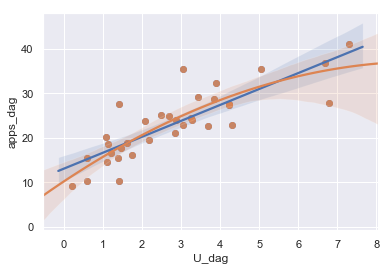

In [65]:
sns.regplot(data['U_dag'],  data["apps_dag"])
sns.regplot(data['U_dag'],  data["apps_dag"], order=2)

interpretatie: wie meer uren per dag zijn smartphone gebruikt, zal ook significant meer verschillende apps gebruiken per dag. 

<li> U_dag ~ verschil_WEEK: r = -0.675, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


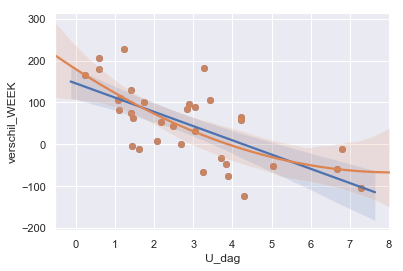

In [67]:
sns.regplot(data['U_dag'],  data["verschil_WEEK"])
sns.regplot(data['U_dag'],  data["verschil_WEEK"], order=2)

interpretatie: wie een laag aantal uren per dag zijn smartphone gebruikt zal het aantal minuten gebruik per dag tijdens de week gaan overschatten. <br>
    Wie rond de drie uur per dag de smartphone zal gaan gebruiken, zal het aantal minuten gebruik per dag tijdens de week goed gaan inschatten, terwijl de sterkere gebruikers hun gebruik eerder zullen gaan onderschatten. 

<li> U_dag ~ verschil_WEEKEND: r = -0.456, p = 0.007 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


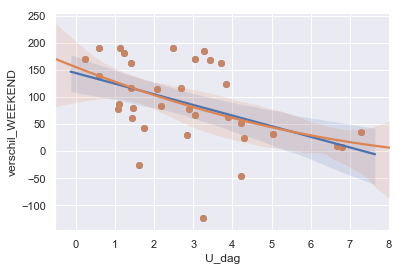

In [69]:
sns.regplot(data['U_dag'],  data["verschil_WEEKEND"])
sns.regplot(data['U_dag'],  data["verschil_WEEKEND"], order=2)

interpretatie: in het algemeen lijkt er minder onderschatting op te treden aangezien de slope minder sterk is en niet onder 0 gaat. <br> wanneer mensen dus het gemiddeld aantal minuten per dag tijdens het weekend moeten inschatten, lijkt er vooral een overschatting te zijn, die afneemt naarmate men meer de smartphone gebruikt. 

<li> U_dag ~ prop_mean_app_eventsGAME_ARCADE: r = 0.445, p = 0.008 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


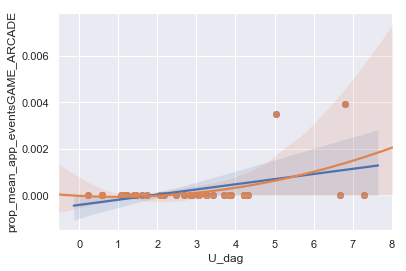

In [70]:
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsGAME_ARCADE"])
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsGAME_ARCADE"], order=2)

geen interessante correlatie volgens mij => vertekend. 

<li>U_dag ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r = -0.418, p = 0.014 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


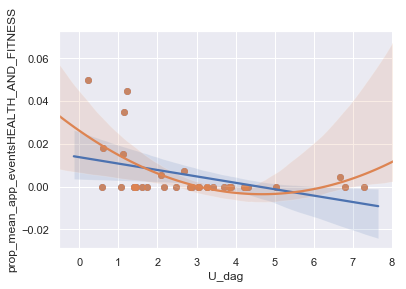

In [71]:
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

Interpretatie: niet echt duidelijk of dit echt een zinvol verband is, maar wat kan afgeleid worden is dat mensen die significant minder uren per dag hun smartphone gebruiken, een hogere proportie hebben in gemiddeld aantal app events met HEALTH AND FITNESS applicaties. 

<li>U_dag ~ prop_mean_app_eventsSHOPPING: r=0.346, p = 0.045 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


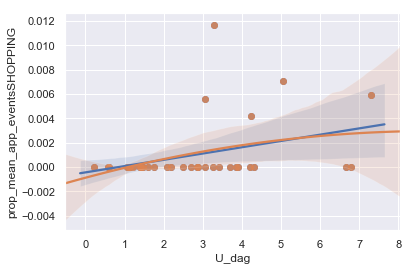

In [73]:
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsSHOPPING"])
sns.regplot(data['U_dag'],  data["prop_mean_app_eventsSHOPPING"], order=2)

Interpretatie: ook niet volledig duidelijk of dit echt een zinvol verband is, maar wat kan afgeleid worden is dat mensen die significant meer uren per dag hun smartphone gebruiken, ook een hogere proportie hebben in het gemiddeld aantal app events op SHOPPING applicaties. 

<li>U_dag ~ prop_treintjes_3: r = -0.394, p= 0.021  </li>

In [74]:
sns.regplot(data['U_dag'],  data["prop_treintjes_3"])
sns.regplot(data['U_dag'],  data["prop_treintjes_3"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie???

<li>apps_dag ~ verschil_WEEK: r= -0.574, p < .001 </li>

Deze correlatie was niet significant voor verschil_WEEKEND! 

In [75]:
sns.regplot(data['apps_dag'],  data["verschil_WEEK"])
sns.regplot(data['apps_dag'],  data["verschil_WEEK"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Interpretatie: wie tussen de 10 en 20 à 25 applicaties per dag gebruikt gemiddeld, zal eerder een overschatting vertonen van het aantal minuten per dag dat ze hun smartphone gebruiken tijdens de week. <br>
    Wie rond de 25 à 30 applicaties gebruikt tijdens de week zal hun gemiddeld gebruik tijdens de weekdag goed inschatten, terwijl iemand die significant meer apps per dag gebruikt, zal hun gemiddeld gebruik per dag tijdens de week gaan onderschatten. 

<li>apps_dag ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r= -0.442, p = 0.009 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


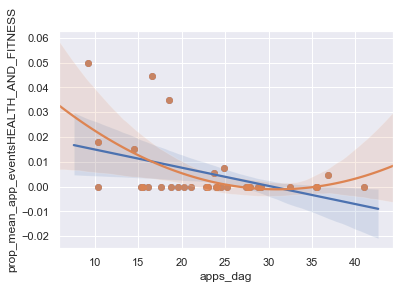

In [76]:
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

Interpretatie: wie significant minder applicaties gebruikt per dag zal proportioneel meer gebruik maken van HEALTH applicaties. Deze worden niet meer gebruikt bij mensen die meer dan 20 applicaties per dag gebruiken. 

<li>apps_dag ~ prop_mean_app_eventsPHOTOGRAPHY:r=-0.439, p= 0.009 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


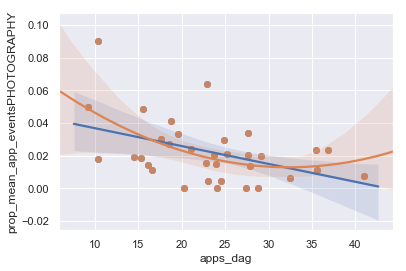

In [77]:
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsPHOTOGRAPHY"])
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsPHOTOGRAPHY"], order=2)

interpretatie: Wie significant meer gebruikt maakt van meer verschillende applicaties per dag, zal minder gebruik maken van photography-gerelateerde applicaties. 

<li>apps_dag ~ prop_mean_app_eventsSHOPPING: r=0.426, p= 0.012 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


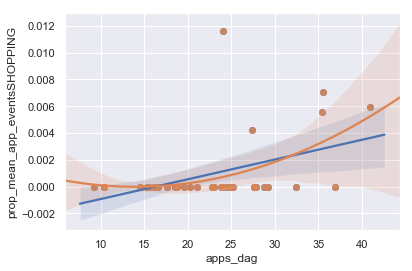

In [80]:
sns.regplot(data["apps_dag"],  data["prop_mean_app_eventsSHOPPING"])
sns.regplot(data["apps_dag"],  data["prop_mean_app_eventsSHOPPING"], order=2)

Interpretatie: wie meer applicaties per dag gebruikt, zal significant meer shopping applicaties (meer dan 25) gebruiken. shopping applicaties kunnen dus misschien wel gezien worden als een extra'tje voor een sterke gebruiker. 

<li>apps_dag ~ prop_mean_app_eventsTOOLS: r=-0.399, p= 0.019 </li>

In [81]:
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsTOOLS"])
sns.regplot(data['apps_dag'],  data["prop_mean_app_eventsTOOLS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie meer applicaties per dag gebruikt, zal proportioneel minder TOOLS als applicatie gebruiken (komt dit niet doordat je kijkt naar de proportie? kleinere proportie indien meer applicaties?)

<li>verschil_WEEK ~ verschil_WEEKEND : r=0.558, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


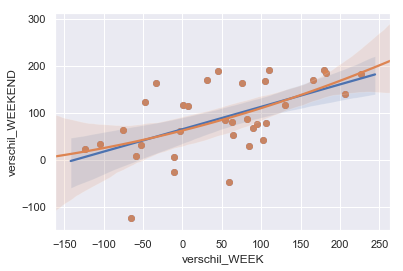

In [82]:
sns.regplot(data['verschil_WEEK'],  data["verschil_WEEKEND"])
sns.regplot(data['verschil_WEEK'],  data["verschil_WEEKEND"], order=2)

Interpretatie: De curve toont dat er tijdens het WEEKEND vooral overschatting van het gebruik optreedt, maar hoe groter de overschatting tijdens de WEEK, hoe significant groter de overschatting tijdens het WEEKEND. 

<li>verschil_WEEK ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r=0.463, p = 0.006 </li>

In [83]:
sns.regplot(data['verschil_WEEK'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['verschil_WEEK'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: dit verloopt lijkt aan te tonen dat wie meer overschatting van gebruik vertoond tijdens de WEEK, zal een significant grotere proportie aan mean app events in HEALTH applicaties vertonen. 

<li>verschil_WEEK ~ gem_appE: r=-0.390, p=0.022 </li>

In [84]:
sns.regplot(data['verschil_WEEK'],  data["gem_appE"])
sns.regplot(data['verschil_WEEK'],  data["gem_appE"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie eerder een onderschatting vertoond van het effectieve gebruik, zal een hoger gemiddeld aantal app events vertonen per sessie (meer multitasking binnen smartphone). <br>
    Terwijl iemand die eerder een overschatting vertoond van het effectieve smartphonegebruik, zal significiant lager gemiddeld aantal app events vertonen per sessie (minder multitasking binnen smartphone).

<li>verschil_WEEKEND ~ prop_appevents_12U-13U: r=0.434, p = 0.010 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


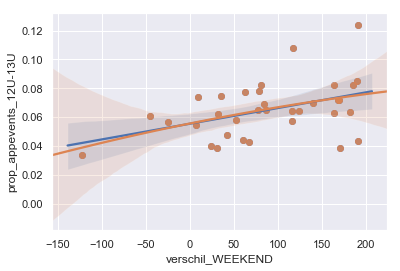

In [85]:
sns.regplot(data['verschil_WEEKEND'],  data["prop_appevents_12U-13U"])
sns.regplot(data['verschil_WEEKEND'],  data["prop_appevents_12U-13U"], order=2)

interpretatie: wie zijn effectieve smarpthonegebruik overschat, zal proportioneel meer appevents vertonen tijdens het uurblok van 12U-13U. 

<li>verschil_WEEKEND ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r=0.419, p=0.014 </li>

In [87]:
sns.regplot(data['verschil_WEEKEND'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['verschil_WEEKEND'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie zijn effectieve smartphonegebruik overschat, zal proportioneel meer appevents vertonen met een app gelinkd met HEALTH AND FITNESS 

<li>verschil_WEEKEND ~ gem_appE: r=-0.496, p=0.003 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


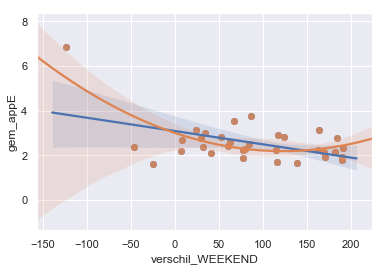

In [88]:
sns.regplot(data['verschil_WEEKEND'],  data["gem_appE"])
sns.regplot(data['verschil_WEEKEND'],  data["gem_appE"], order=2)

vertekend verband? 

<li>prop_appevents_12U-13U ~ prop_appevents_13U-18U: r=0.404, p: 0.018 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


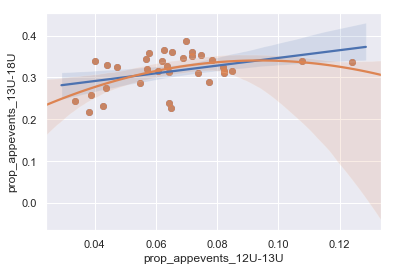

In [89]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_13U-18U"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_13U-18U"], order=2)

interpretatie: (misschien een vertekend verband?) In het algemeen proportioneel meer appevents tijdens 12U-13U, maar wie een hogere proportie appevents vertoond tijdens 12U-13U, zal dit ook doen tijdens 13U-18U. 

<li>prop_appevents_12U-13U ~ prop_appevents_18U-23U: r=-0.512, p:0.002 </li>

In [90]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_18U-23U"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_18U-23U"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Interpretatie: in het algemeen hogere proportie appevents tijdens 18U-23U, maar wie een hogere proportie appevents vertoond tijdens 12U-13u, zal minder appevents vertonen tijdens 18U-23U. 

<li>prop_appevents_12U-13U ~ prop_appevents_5U-9U : r=-0.404, p:0.018 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


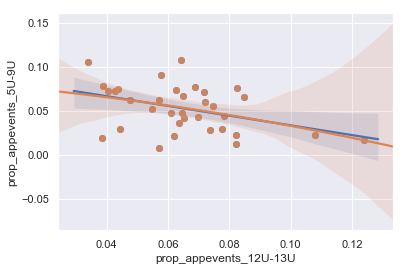

In [91]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_5U-9U"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_appevents_5U-9U"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tijdens 12U-13U, zal er significant minder gaan vertonen tussen 5U-9U. 

<li>prop_appevents_12U-13U ~ prop_mean_app_eventsMAPS_AND_NAVIGATION: r=-0.387, p:0.024 </li>

In [92]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_mean_app_eventsMAPS_AND_NAVIGATION"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_mean_app_eventsMAPS_AND_NAVIGATION"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Niet echt een nuttig verband om te interpreteren? Wie proportioneel meer appevents vertoond tussen 12U-13U, zal proportioneel minder app events vertonen gelink met de MAPS and NAVIGATION categorie. 

<li>prop_appevents_12U-13U ~ prop_mean_app_eventsTRAVEL_AND_LOCAL: r=0.433, p:0.011 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


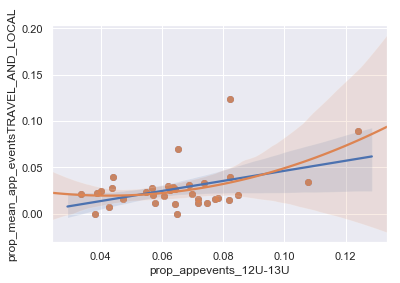

In [93]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 12U en 13U, zal proportioneel ook meer app events vertonen die gelinked zijn aan TRAVEL AND LOCAL. (wat houdt deze categorie specifiek in?)

<li>prop_appevents_12U-13U ~ prop_SC_prop: r=0.403, p:0.018 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


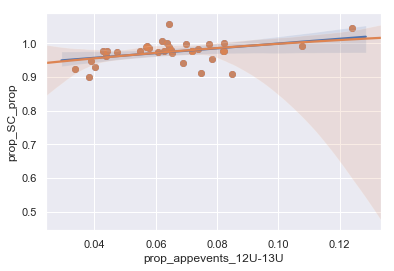

In [94]:
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_SC_prop"])
sns.regplot(data['prop_appevents_12U-13U'],  data["prop_SC_prop"], order=2)

interpretatie: wie een significant groter proportie appevents vertoond tussen 12U en 13U, heeft een proportioneel kleinere switch cost in accuraatheidsproportie, namelijk een kleiner verlies in accuraatheid tussen Mixed en non-mixed blokken.  

<li>prop_appevents_13U-18U ~ prop_appevents_23U-5U: r=-0.642, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


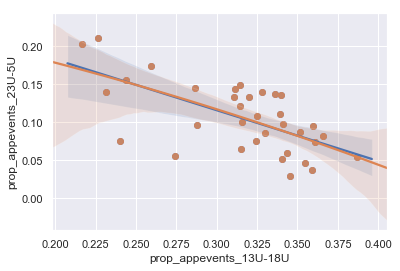

In [95]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_appevents_23U-5U"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_appevents_23U-5U"], order=2)

interpretatie: in het algemeen is de proportie appevents tijdens het uurblok 13U-18U hoger, maar wie een lagere proportie appevents vertoond tijdens 13U-18U, vertoond een hogere proportie appevents tijdens 23U-5U. 

<li>prop_appevents_13U-18U ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r=-0.350, p=0.042 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


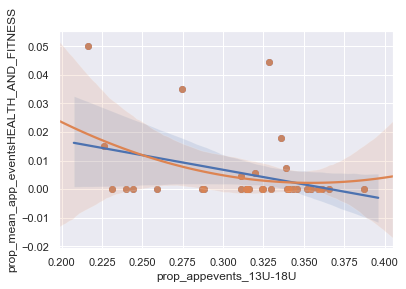

In [96]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

interpretatie: is dit wel een betrouwbaar verband? wie proportioneel meer appevents vertoond tijdens het uurblok van 13U-18U, zal proportioneel minder appevents vertonen in de categorie HEALTH AND FITNESS (over de tijdsblokken heen). 

<li>prop_appevents_13U-18U ~ prop_mean_app_eventsMAPS_AND_NAVIGATION: r=-0.471, p=0.005 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


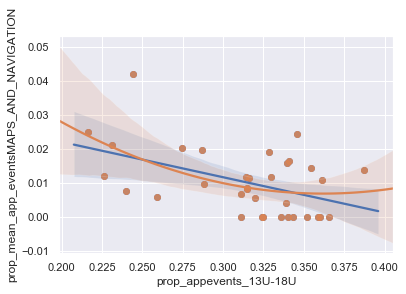

In [97]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsMAPS_AND_NAVIGATION"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsMAPS_AND_NAVIGATION"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 13U-18U, zal proportioneel gemiddeld minder appevents vertonen die gelinked zijn met MAPS and NAVIGATION

<li>prop_appevents_13U-18U ~ prop_mean_app_eventsNEWS_AND_MAGAZINES: r=-0.526, p=0.002 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


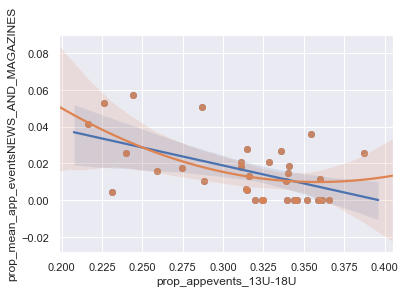

In [98]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 13U-18U, zal proportioneel gemiddeld minder appevents vertonen die gelinked zijn met NEWS and MAGAZINES. 

<li>prop_appevents_13U-18U ~ prop_mean_app_eventsPRODUCTIVITY: r=0.356, p=0.039 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


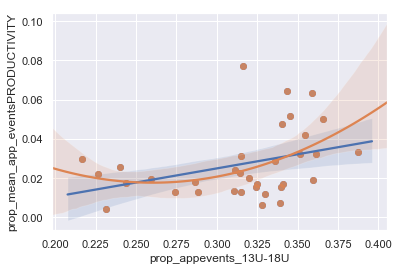

In [99]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsPRODUCTIVITY"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsPRODUCTIVITY"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 13U-18U, zal proportioneel gemiddeld meer appevents vertonen die gelinked zijn met PRODUCTIVITY applicaties. (wat houdt deze categorie in?)

<li>prop_appevents_13U-18U ~ prop_mean_app_eventsSPORTS: r=-0.580, p < .001 </li>

In [101]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_mean_app_eventsSPORTS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie proportioneel meer appevents vertoont tussen 13U-18U, zal proportioneel gemiddeld minder appevents vertonen die gelinked zijn met SPORTS applicaties. 

<li>prop_appevents_13U-18U ~ gem_appE: r=-0.426, p=0.012 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


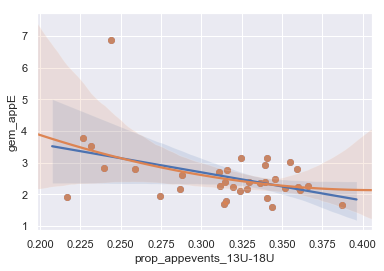

In [103]:
sns.regplot(data['prop_appevents_13U-18U'],  data["gem_appE"])
sns.regplot(data['prop_appevents_13U-18U'],  data["gem_appE"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 13U-18U, zal proportioneel gemiddeld minder appevents vertonen tijdens één smartphonesessie. 

<li>prop_appevents_13U-18U ~ reactieSec_not: r=-0.355, p=0.039 </li>

In [104]:
sns.regplot(data['prop_appevents_13U-18U'],  data["reactieSec_not"])
sns.regplot(data['prop_appevents_13U-18U'],  data["reactieSec_not"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: volledig vertekend door 1 outlier? Anders: wie een hogere proportie appevents vertoont tijdens 13U-18U, zal ook sneller reageren op een notificatie. 

<li>prop_appevents_13U-18U ~ prop_single_app_gr3: r=0.398, p=0.020 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


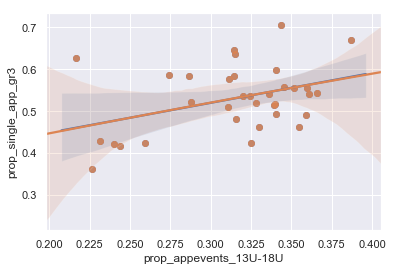

In [105]:
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_single_app_gr3"])
sns.regplot(data['prop_appevents_13U-18U'],  data["prop_single_app_gr3"], order=2)

interpretatie: Hoe hoger de proportie appevents tijdens het blok van 13U-18U hoe groter de proportie van single appevents per sessies tov de multiple appevents. Dit wijst op het feit dat hoe meer appevents tijdens dit blok, men minder multitasking zal vertonen, dus eerder single apps zal gebruiken per sessie. 

<li>prop_appevents_18U-23U ~ prop_appevents_9U-12U: r= -0.689, p < .001 </li>

In [106]:
sns.regplot(data['prop_appevents_18U-23U'],  data["prop_appevents_9U-12U"])
sns.regplot(data['prop_appevents_18U-23U'],  data["prop_appevents_9U-12U"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie significant grotere proportie appevents vertoont tussen 9U en 12U, zal minder hoge proportie appevents vertonen tussen 18U-23U. 

<li>prop_appevents_18U-23U ~ prop_mean_app_eventsHEALTH_AND_FITNESS: r=0.365 p=0.034 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


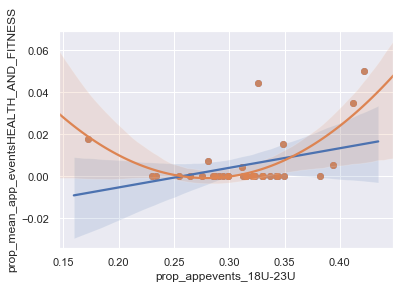

In [107]:
sns.regplot(data['prop_appevents_18U-23U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['prop_appevents_18U-23U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 18U-23U, zal ook proportioneel meer appevents vertonen gelinked met HEALTH AND FITNESS. 

<li>prop_appevents_23U-5U ~ prop_mean_app_eventsHEALTH_AND_FITNESS r = 0.363, p =0.035 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


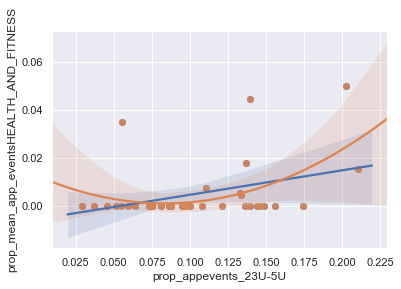

In [108]:
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"])
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsHEALTH_AND_FITNESS"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 23U-5U, zal ook proportioneel meer appevents vertonen gelinked met HEALTH AND FITNESS.

<li>prop_appevents_23U-5U ~ prop_mean_app_eventsNEWS_AND_MAGAZINES r = 0.441, p=0.010 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


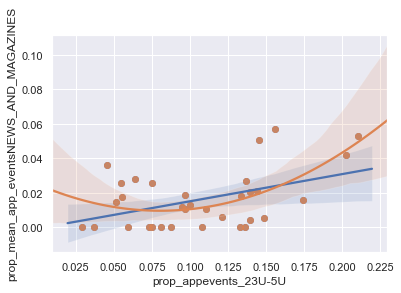

In [110]:
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"])
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 23U-5U, zal ook proportioneel meer appevents vertonen gelinked met NEWS and MAGAZINES.

<li>prop_appevents_23U-5U ~ prop_mean_app_eventsPRODUCTIVITY: r=-0.482, r=0.004 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


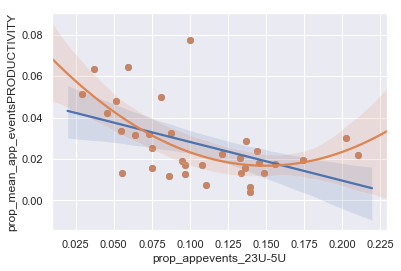

In [111]:
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsPRODUCTIVITY"])
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsPRODUCTIVITY"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 23U-5U, zal ook proportioneel minder appevents vertonen gelinked met PRODUCTIVITY (houdt in?).

<li>prop_appevents_23U-5U ~ prop_mean_app_eventsSPORTS r=0.556, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


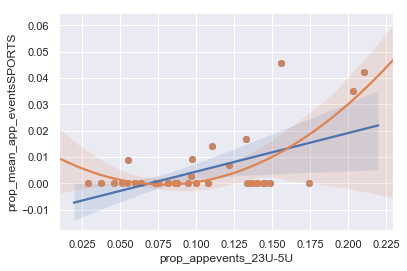

In [112]:
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsSPORTS"], order=2)

interpretatie: wie proportioneel meer appevents vertoont tussen 23U-5U, zal ook proportioneel meer appevents vertonen gelinked met SPORTS.

<li>prop_appevents_23U-5U ~ prop_mean_app_eventsTOOLS: r=0.465, p=0.006 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


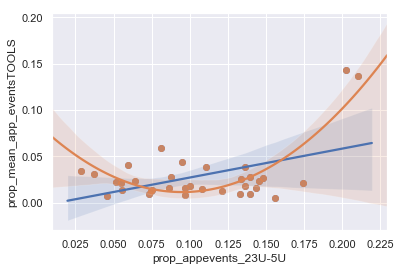

In [114]:
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsTOOLS"])
sns.regplot(data['prop_appevents_23U-5U'],  data["prop_mean_app_eventsTOOLS"], order=2)

Is dit toegelaten om te interpreteren of eerder een kwestie van vertekening? eventueel: wie proportioneel meer appevents vertoont tussen 23U-5U, zal ook proportioneel meer appevents vertonen gelinked met TOOLS.

<li>prop_appevents_23U-5U ~ reactieSec_not: r=0.387, p=0.024 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


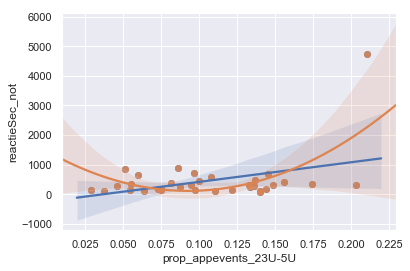

In [115]:
sns.regplot(data['prop_appevents_23U-5U'],  data["reactieSec_not"])
sns.regplot(data['prop_appevents_23U-5U'],  data["reactieSec_not"], order=2)

vertekening? anders interpretatie: proportioneel meer appevents vertoond tijdens 23U-5U zal in het algemeen ook trager reageren op notificaties. 

<li>prop_appevents_5U-9U ~ prop_appevents_9U-12U: r = 0.415, p=0.015 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


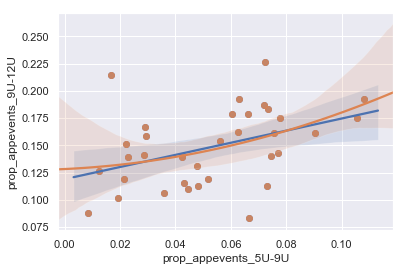

In [116]:
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_appevents_9U-12U"])
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_appevents_9U-12U"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal significant een grotere proportie appevents vertonen tussen 9U-12U. 

<li>prop_appevents_5U-9U ~ prop_mean_app_eventsPRODUCTIVITY: r =0.390, p=0.023 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


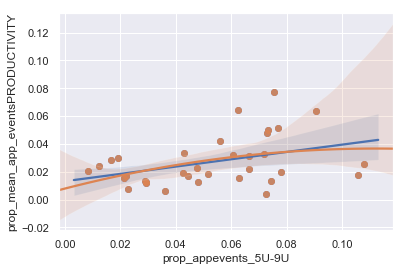

In [117]:
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsPRODUCTIVITY"])
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsPRODUCTIVITY"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal significant een grotere proportie appevents vertonen die gelinked zijn met de PRODUCTIVITY categorie (wat houdt deze in?).

<li>prop_appevents_5U-9U ~ prop_mean_app_eventsSOCIAL: r=-0.447, p=0.008 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


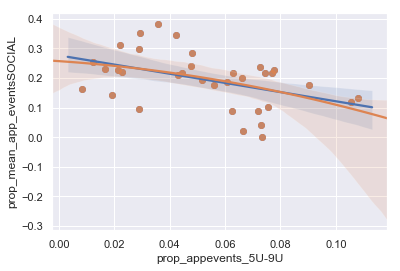

In [118]:
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsSOCIAL"])
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsSOCIAL"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal significant een kleindere proportie appevents vertonen die gelinked zijn met de SOCIAL categorie

<li>prop_appevents_5U-9U ~ prop_mean_app_eventsTRAVEL_AND_LOCAL: r=-0.348, p=0.044 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


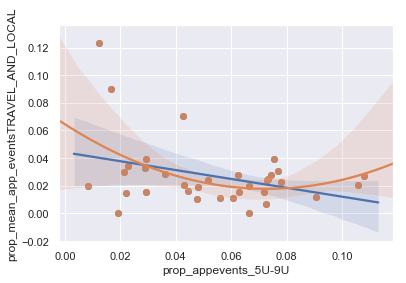

In [119]:
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"])
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal significant een kleindere proportie appevents vertonen die gelinked zijn met de TRAVEL_AND_LOCAL categorie

<li>prop_appevents_5U-9U ~ prop_mean_app_eventsunknown: r=0.592, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


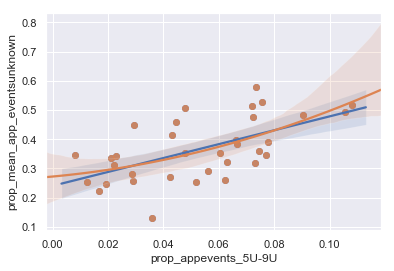

In [121]:
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsunknown"])
sns.regplot(data['prop_appevents_5U-9U'],  data["prop_mean_app_eventsunknown"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal een significant grotere proportie appevents vertonen die gelinked zijn met de unknown categorie

<li>prop_appevents_5U-9U ~ gem_appE: r=0.397, p=0.020 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


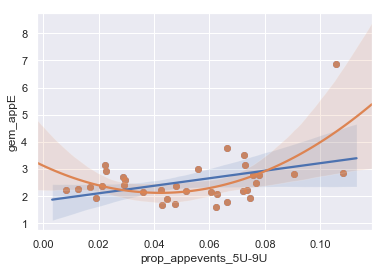

In [122]:
sns.regplot(data['prop_appevents_5U-9U'],  data["gem_appE"])
sns.regplot(data['prop_appevents_5U-9U'],  data["gem_appE"], order=2)

door vertekening? <br>
anderzijds, interpretatie: wie proportioneel meer appevents vertoond tussen 5U-9U, zal een gemiddeld meer appevents per sessie.

<li>prop_appevents_9U-12U ~ prop_mean_app_eventsSPORTS: r=-0.345, p=0.046 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


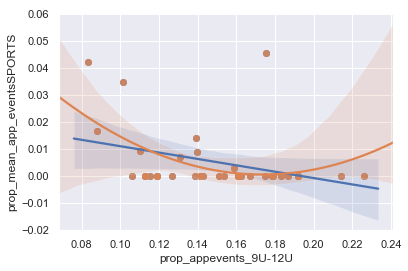

In [123]:
sns.regplot(data['prop_appevents_9U-12U'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_appevents_9U-12U'],  data["prop_mean_app_eventsSPORTS"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 9U-12U, zal proportioneel minder appevents vertonen die gelinked zijn aan de categorie SPORTS.

<li>prop_appevents_9U-12U ~ prop_mean_app_eventsTOOLS: r=-0.407, p=0.017 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


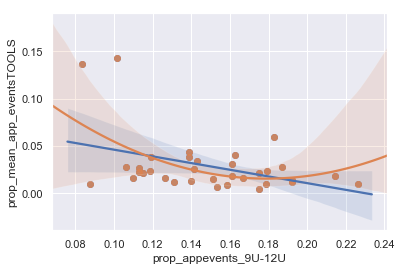

In [124]:
sns.regplot(data['prop_appevents_9U-12U'],  data["prop_mean_app_eventsTOOLS"])
sns.regplot(data['prop_appevents_9U-12U'],  data["prop_mean_app_eventsTOOLS"], order=2)

interpretatie: wie proportioneel meer appevents vertoond tussen 9U-12U, zal proportioneel minder appevents vertonen die gelinked zijn aan de categorie TOOLS.

<li>prop_mean_app_eventsENTERTAINMENT ~ prop_mean_app_eventsGAME_ARCADE: r=0.432, p=0.011</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


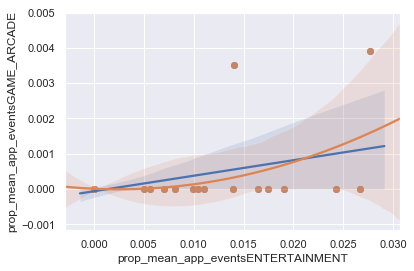

In [125]:
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["prop_mean_app_eventsGAME_ARCADE"])
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["prop_mean_app_eventsGAME_ARCADE"], order=2)

geen betrouwbaar verband, aangezien GAME_ARCADE heel erg weinig voorkomt?

<li>prop_mean_app_eventsENTERTAINMENT ~ ratio_startedW: r=0.517, p=0.002</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


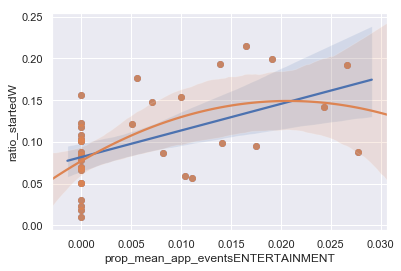

In [126]:
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["ratio_startedW"])
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["ratio_startedW"], order=2)

interpretatie: wie proportioneel meer app events heeft die gekoppeld is aan ENTERTAINMENT, zal ook een significant hogere ratio hebben van sessies die gestart zijn via een notificatie. <br>
    Wat houdt die entertainmentcategorie echter precies in? 

<li>prop_mean_app_eventsENTERTAINMENT ~ IQ: r=-0.387, p=0.026</li>   

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


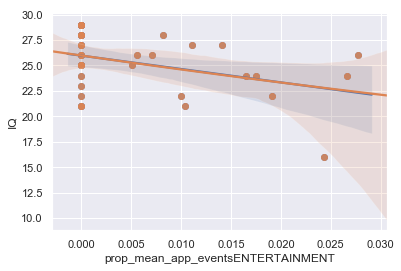

In [127]:
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["IQ"])
sns.regplot(data['prop_mean_app_eventsENTERTAINMENT'],  data["IQ"], order=2)

interpretatie: wie een hogere proportie aan app events vertoond die gelinked is aan de ENTERTAINMENT categorie, zal een signficant lager IQ vertonen. 

<li>prop_mean_app_eventsGAME_ARCADE ~ prop_mean_app_eventsVIDEO_PLAYERS: r=0.682, p < .001 </li>

In [128]:
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["prop_mean_app_eventsVIDEO_PLAYERS"])
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["prop_mean_app_eventsVIDEO_PLAYERS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:579: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

geen betrouwbaar verband, aangezien te weinig mensen een applicatie gebruiken gekoppeld aan GAME_ARCADE (misschien eens kijken naar GAME, meer gekoppeld daarmee. )

<li>prop_mean_app_eventsGAME_ARCADE ~ interceptRT: r=-0.366, p=0.036 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regress

LinAlgError: SVD did not converge in Linear Least Squares

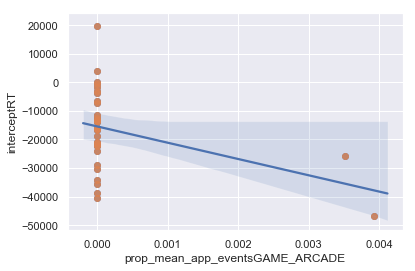

In [129]:
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["interceptRT"])
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["interceptRT"], order=2)

idem probleem als hierboven. 

<li>prop_mean_app_eventsGAME_ARCADE ~ slopeRT: r=0.419, p=0.015 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regress

LinAlgError: SVD did not converge in Linear Least Squares

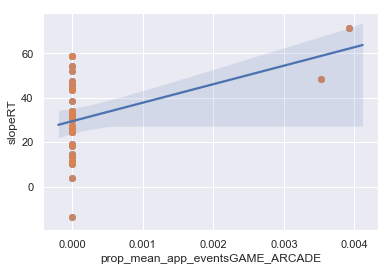

In [130]:
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["slopeRT"])
sns.regplot(data['prop_mean_app_eventsGAME_ARCADE'],  data["slopeRT"], order=2)

In [ ]:
idem probleem als hierboven. 

<li>prop_mean_app_eventsHEALTH_AND_FITNESS ~ prop_mean_app_eventsSPORTS: r=0.380, p=0.027 </li>

In [133]:
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsSPORTS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regress

betrouwbaar? anders, interpretatie: wie proportioneel meer app events vertoond gekoppeld aan de HEALTH and FITNESS categorie, zal ook proportioneel meer appevents vertonen gelinked aan de SPORTS categorie. 

<li>prop_mean_app_eventsHEALTH_AND_FITNESS ~ prop_mean_app_eventsTOOLS: r=0.503, p=0.002 </li>

In [134]:
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsTOOLS"])
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsTOOLS"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


betrouwbaar? anders, interpretatie: wie proportioneel meer app events vertoond gekoppeld aan de HEALTH and FITNESS categorie, zal ook proportioneel meer appevents vertonen gelinked aan de TOOLS categorie.

<li>prop_mean_app_eventsHEALTH_AND_FITNESS ~ prop_mean_app_eventsunknown: r=-0.441, p=0.009 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


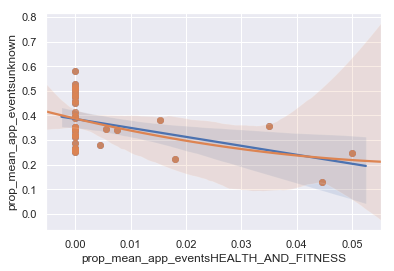

In [135]:
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsunknown"])
sns.regplot(data['prop_mean_app_eventsHEALTH_AND_FITNESS'],  data["prop_mean_app_eventsunknown"], order=2)

<li>prop_mean_app_eventsLIFESTYLE ~ prop_mean_app_eventsPHOTOGRAPHY: r=0.614, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


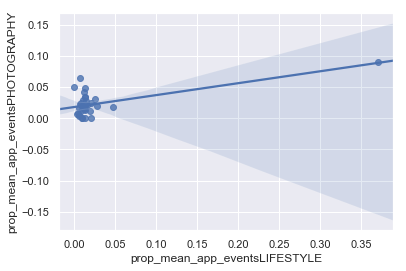

In [137]:
sns.regplot(data['prop_mean_app_eventsLIFESTYLE'],  data["prop_mean_app_eventsPHOTOGRAPHY"])


vertekende correlatie 

<li>prop_mean_app_eventsLIFESTYLE ~ sleepquality: r=0.363, p=0.035 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


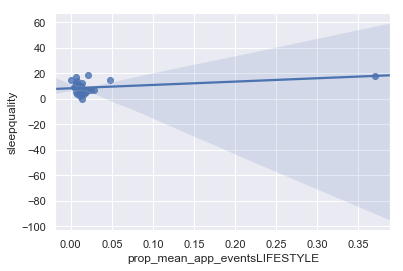

In [138]:
sns.regplot(data['prop_mean_app_eventsLIFESTYLE'],  data["sleepquality"])

vertekende correlatie 

<li>prop_mean_app_eventsMAPS_AND_NAVIGATION ~ prop_mean_app_eventsNEWS_AND_MAGAZINES: r=0.529, p=0.002 </li>    

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


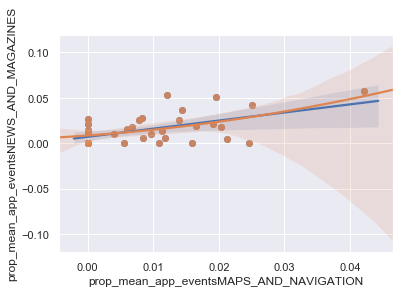

In [139]:
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"])
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_mean_app_eventsNEWS_AND_MAGAZINES"], order=2)

interpretatie: wie proportioneel meer app events vertoond in de categorie NEWS AND MAGAZINES, zal ook significant een hogere proportie app events vertonen gelinked met MAPS_AND_NAVIGATION. 

<li>prop_mean_app_eventsMAPS_AND_NAVIGATION ~ prop_mean_app_eventsSPORTS: r=0.531, p=0.001 </li>   

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


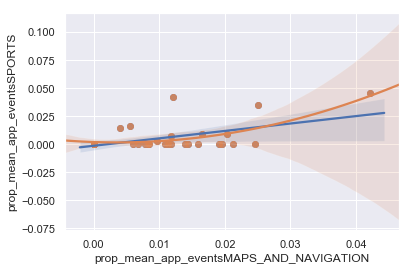

In [140]:
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_mean_app_eventsSPORTS"], order=2)

interpretatie: wie proportioneel meer app events vertoond in de categorie NEWS AND MAGAZINES, zal ook significant een hogere proportie app events vertonen gelinked met SPORTS.

<li>prop_mean_app_eventsMAPS_AND_NAVIGATION ~ prop_SC_prop: r=-0.380, p=0.027  </li> 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


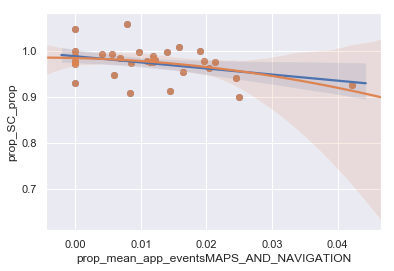

In [141]:
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_SC_prop"])
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["prop_SC_prop"], order=2)

vertekening? anderszijds, interpretatie: wie een hogere proportie app events vertoond gelinked met de categorie MAPS_AND_NAVIGATION zal ook een zal ook een hogere kost in accuraatheid vertonen tijdens de task-switching taak. 

<li>prop_mean_app_eventsMAPS_AND_NAVIGATION ~ gem_appE: r=0.453, p=0.007  </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


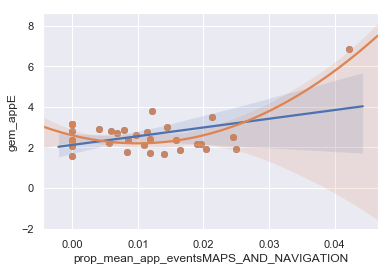

In [142]:
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["gem_appE"])
sns.regplot(data['prop_mean_app_eventsMAPS_AND_NAVIGATION'],  data["gem_appE"], order=2)

vertekend? anders, interpretatie: wie proportioneel een hoger gemiddelde aan app events vertoond gelinked aan de categorie MAPS_AND_NAVIGATION, zal ook een hoger gemiddelde aan appevents per sessie vertonen. 

<li>prop_mean_app_eventsMUSIC_AND_AUDIO ~ prop_mean_app_eventsTRAVEL_AND_LOCAL: r=0.388, p=0.023    </li>      

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


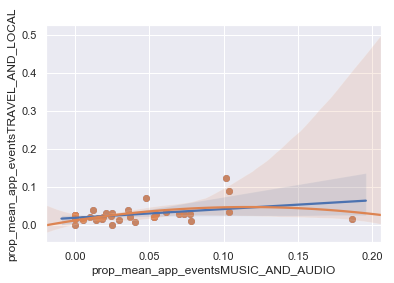

In [143]:
sns.regplot(data['prop_mean_app_eventsMUSIC_AND_AUDIO'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"])
sns.regplot(data['prop_mean_app_eventsMUSIC_AND_AUDIO'],  data["prop_mean_app_eventsTRAVEL_AND_LOCAL"], order=2)

vertekend? interpretatie: wie proportioneel meer app events vertoont gelinked aan de categorie MUSIC_AND_AUDIO, zal ook proportioneel meer app events vertonen gelinked met TRAVEL_AND_LOCAL categorie. 

                                                                                         
<li>prop_mean_app_eventsMUSIC_AND_AUDIO ~ Prop_RT_SC: r=0.374, p=0.029 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


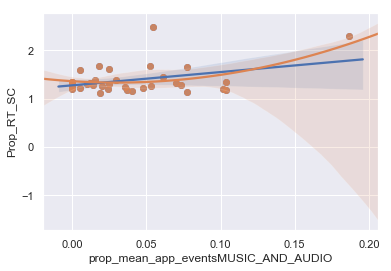

In [144]:
sns.regplot(data['prop_mean_app_eventsMUSIC_AND_AUDIO'],  data["Prop_RT_SC"])
sns.regplot(data['prop_mean_app_eventsMUSIC_AND_AUDIO'],  data["Prop_RT_SC"], order=2)

interpretatie: wie proportioneel meer app events vertoont gelinked aan de categorie MUSIC_AND_AUDIO, zal ook proportioneel een grotere kost in RT vertonen tijdens de TST. 

<li>prop_mean_app_eventsNEWS_AND_MAGAZINES ~ prop_mean_app_eventsSPORTS: r=0.602, p < .001 </li>  

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


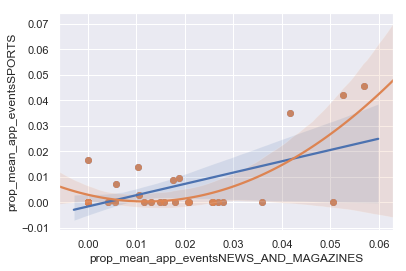

In [145]:
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["prop_mean_app_eventsSPORTS"])
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["prop_mean_app_eventsSPORTS"], order=2)

interpretatie: veel mensen maken geen gebruik van apps gelinked met de SPORTS categorie, maar wie het wel doet, zal het opvallend meer gaan gebruiken, indien ze ook meer app events vertonen die gelinked zijn aan de categorie NEWS_AND_MAGAZINES. 

<li>prop_mean_app_eventsNEWS_AND_MAGAZINES ~ gem_appE: r=0.427, p=0.013 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


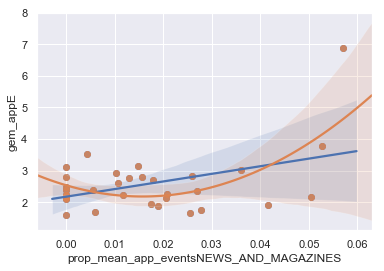

In [149]:
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["gem_appE"])
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["gem_appE"], order=2)

interpretatie: wie een significant hogere proportioneel gemiddeld aantal app events vertoond gelinked met de categorie NEWS_AND_MAGAZINES, zal gemiddeld meer applicaties gebruiken tijdens een sessie. 

<li>prop_mean_app_eventsNEWS_AND_MAGAZINES ~ reactieSec_not: r=0.420, p:0.015 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


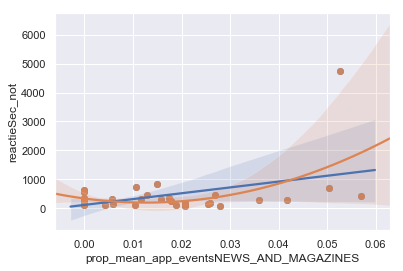

In [150]:
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["reactieSec_not"])
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["reactieSec_not"], order=2)

vertekend? anders, interpretatie: wie een hogere proportie app events gelinked met categorie NEWS & MAGAZINES, zal een tragere reactiesnelehdi vertonen op de notificaties. 

<li>prop_mean_app_eventsNEWS_AND_MAGAZINES ~ IQ: r=-0.423, p=0.016 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


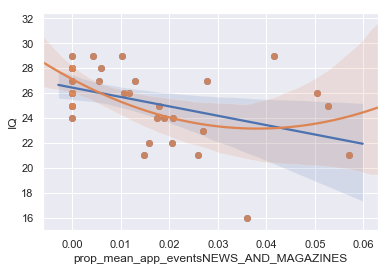

In [152]:
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["IQ"])
sns.regplot(data['prop_mean_app_eventsNEWS_AND_MAGAZINES'],  data["IQ"], order=2)

interpretatie: wie proportioneel meer appevents gekoppeld met de categorie NEWS & MAGAZINES vertoond, vertoond ook een significant lager IQ. 

<li>prop_mean_app_eventsPHOTOGRAPHY ~ prop_mean_app_eventsunknown: r=-0.376, p=0.029 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


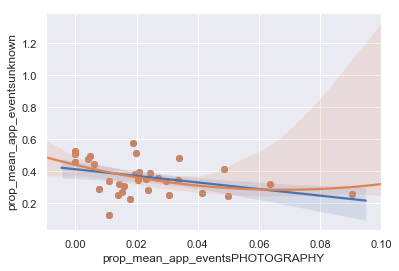

In [154]:
sns.regplot(data['prop_mean_app_eventsPHOTOGRAPHY'],  data["prop_mean_app_eventsunknown"])
sns.regplot(data['prop_mean_app_eventsPHOTOGRAPHY'],  data["prop_mean_app_eventsunknown"], order=2)

interpretatie: wie significant een hogere proportie app events gelinked aan de categorie PHOTOGRAPHY vertoond, zal een lagere proportie app events gelinked aan de "unknown" categorie vertonen. 

<li>prop_mean_app_eventsPRODUCTIVITY ~ prop_mean_app_eventsSHOPPING: r=0.360, p=0.036 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


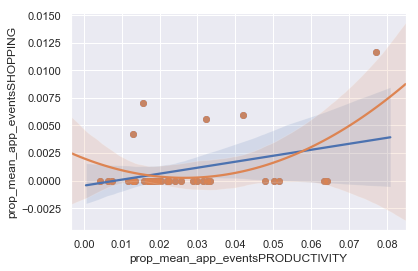

In [155]:
sns.regplot(data['prop_mean_app_eventsPRODUCTIVITY'],  data["prop_mean_app_eventsSHOPPING"])
sns.regplot(data['prop_mean_app_eventsPRODUCTIVITY'],  data["prop_mean_app_eventsSHOPPING"], order=2)

interpreteerbaar? 

<li>prop_mean_app_eventsPRODUCTIVITY ~ prop_mean_app_eventsSOCIAL: r=-0.526, p=0.001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


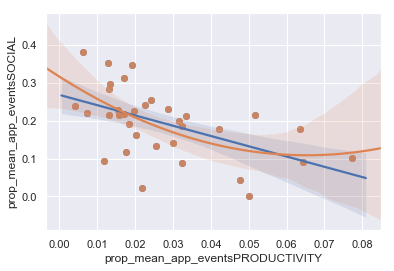

In [156]:
sns.regplot(data['prop_mean_app_eventsPRODUCTIVITY'],  data["prop_mean_app_eventsSOCIAL"])
sns.regplot(data['prop_mean_app_eventsPRODUCTIVITY'],  data["prop_mean_app_eventsSOCIAL"], order=2)

interpretatie: wie een hogere proportie app events vertoond gelinked aan de categorie PRODUCTIVITY, zal een lagere proportie app events vertonen gelinked aan SOCIAL. 

<li>prop_mean_app_eventsSOCIAL ~ prop_mean_app_eventsunknown: r=-0.358, p=0.038 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


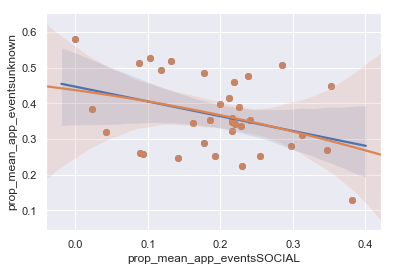

In [157]:
sns.regplot(data['prop_mean_app_eventsSOCIAL'],  data["prop_mean_app_eventsunknown"])
sns.regplot(data['prop_mean_app_eventsSOCIAL'],  data["prop_mean_app_eventsunknown"], order=2)

interpretatie: wie een hogere proportie app events vertoont verbonden met categorie SOCIAL, vertoond een lagere proportie app events verbonden met categorie unknown. 

<li>prop_mean_app_eventsSOCIAL ~ reactieSec_not: r=-0.395, p=0.021 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


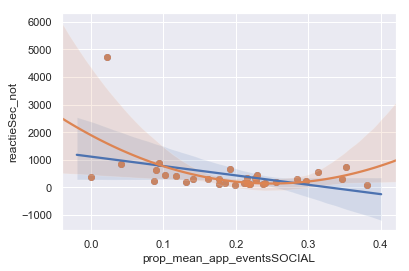

In [158]:
sns.regplot(data['prop_mean_app_eventsSOCIAL'],  data["reactieSec_not"])
sns.regplot(data['prop_mean_app_eventsSOCIAL'],  data["reactieSec_not"], order=2)

interpretatie: wie een hogere proportie appevents vertoond in de categorie SOCIAL, vertoond een veel kortere reactietijd op de notificaties. 

<li>prop_mean_app_eventsSPORTS ~ prop_mean_app_eventsTOOLS: r=0.560, p< .001</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


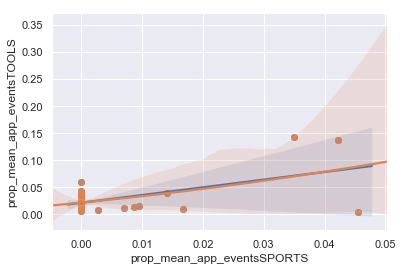

In [159]:
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["prop_mean_app_eventsTOOLS"])
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["prop_mean_app_eventsTOOLS"], order=2)

Niet erg betrouwbaar volgens mij, maar kan interpreteert worden als: wie proportioneel meer app events vertoond gelinked aan SPORTS, vertoond ook proportioneel meer appevents gelinked aan TOOLS

<li>prop_mean_app_eventsSPORTS ~ gem_appE: r=0.563, p < .001</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\beheerder\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


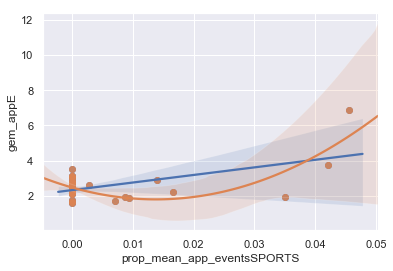

In [160]:
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["gem_appE"])
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["gem_appE"], order=2)

niet erg betrouwbaar, maar kan ook geïnterpreteerd worden als: wie een hogere proportie app events vertoond gelinked met de categorie SPORTS, zal ook een hoger gemiddeld aantal appevents vertonen per sessie. 

<li>prop_mean_app_eventsSPORTS ~ reactieSec_not: r=0.512, p= 0.002 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


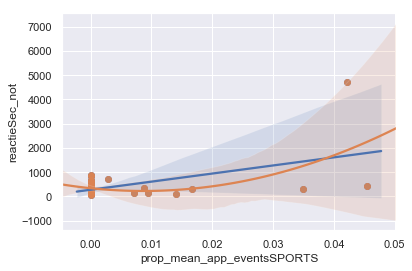

In [161]:
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["reactieSec_not"])
sns.regplot(data['prop_mean_app_eventsSPORTS'],  data["reactieSec_not"], order=2)

niet betrouwbaar interpreteerbaar denk ik. <br>
anders: wie gemiddeld een hogere proportie app events vertoond gelinked met categorie SPORTS, zal ook een tragere reactiesnelheid vertonen op een notificatie. 

<li>prop_mean_app_eventsTOOLS ~ reactieSec_not: r=0.585, p < .001</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


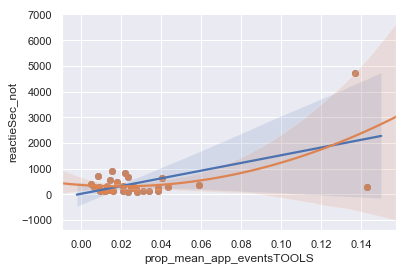

In [162]:
sns.regplot(data['prop_mean_app_eventsTOOLS'],  data["reactieSec_not"])
sns.regplot(data['prop_mean_app_eventsTOOLS'],  data["reactieSec_not"], order=2)

betrouwbaar? Anderzijds, interpretatie: wie een hogere proportie heeft aan app events gelinked met de categorie TOOLs, vertoond een tragere reactiesnelheid op notificaties. 

<li>prop_mean_app_eventsTOOLS ~ ratio_startedW: r=-0.443, p=0.009</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


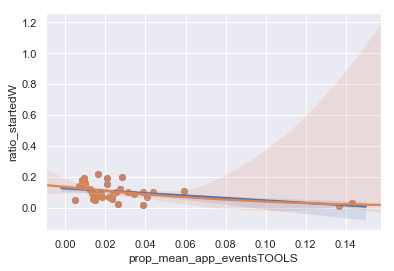

In [163]:
sns.regplot(data['prop_mean_app_eventsTOOLS'],  data["ratio_startedW"])
sns.regplot(data['prop_mean_app_eventsTOOLS'],  data["ratio_startedW"], order=2)

wie een hogere proportie heeft aan app events gelinked met de categorie TOOLS, vertoond een lagere ratio van sessies die gestart zijn vanuit een notificatie. 

<li>prop_mean_app_eventsTRAVEL_AND_LOCAL ~ prop_mean_app_eventsunknown: r=-0.344, p=0.047</li>    

In [164]:
sns.regplot(data['prop_mean_app_eventsTRAVEL_AND_LOCAL'],  data["prop_mean_app_eventsunknown"])
sns.regplot(data['prop_mean_app_eventsTRAVEL_AND_LOCAL'],  data["prop_mean_app_eventsunknown"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Interpretatie: wie een hogere proportie heeft aan app events gelinked met de categorie TRAVEL_AND_LOCAL, vertoond een lagere proportie aan app events gelinked met de unknown categorie. 

<li>prop_mean_app_eventsTRAVEL_AND_LOCAL ~ prop_SC_prop: r=0.371, p=0.031</li>  

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


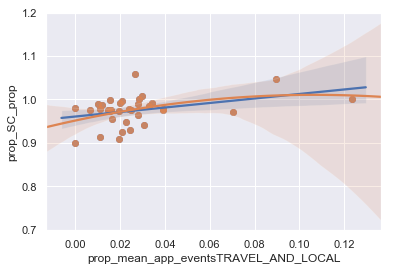

In [165]:
sns.regplot(data['prop_mean_app_eventsTRAVEL_AND_LOCAL'],  data["prop_SC_prop"])
sns.regplot(data['prop_mean_app_eventsTRAVEL_AND_LOCAL'],  data["prop_SC_prop"], order=2)

misschien wel vertekend door bepaalde outliers, maar wie een hogere proportie heeft aan app events gelinked met de categorie TRAVEL_AND_LOCAL, vertoond minder een kost in accuraatheid in de TST. In sommige gevallen zelfs een winst. 

<li>prop_mean_app_eventsVIDEO_PLAYERS ~ interceptRT: r=-0.472, p=0.006 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


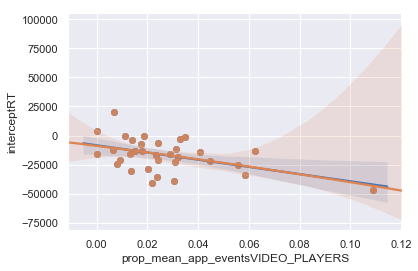

In [166]:
sns.regplot(data['prop_mean_app_eventsVIDEO_PLAYERS'],  data["interceptRT"])
sns.regplot(data['prop_mean_app_eventsVIDEO_PLAYERS'],  data["interceptRT"], order=2)

interpretatie: hoe hoger de proportie app events gelinked aan de categorie VIDEO_PLAYERS, hoe negatiever de waarde van het intercept. Dit kan geïnterpreteerd worden als: by default hebben ze een snellere RT dan iemand met een kleinere negatieve, 0 of positieve waarde voor het interce. 
        

<li>prop_mean_app_eventsVIDEO_PLAYERS ~ slopeRT: r=0.493, p=0.004 </li>

In [168]:
sns.regplot(data['prop_mean_app_eventsVIDEO_PLAYERS'],  data["slopeRT"])
sns.regplot(data['prop_mean_app_eventsVIDEO_PLAYERS'],  data["slopeRT"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


interpretatie: wie proportioneel meer app events hebben gelinked aan de categorie VIDEO_PLAYERS, zal ook een sterkere slope hebben. Dit wil zeggen dat de RT op de bol sneller toeneemt met toename van het interval. Je zou dus kunnen zeggen dat men meer afgeleid raakt, indien men meer met VIDEO_PLAYERS bezig is op de smartphone. 

<li>prop_mean_app_eventsunknown ~ interceptRT: r=0.358, p=0.041 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


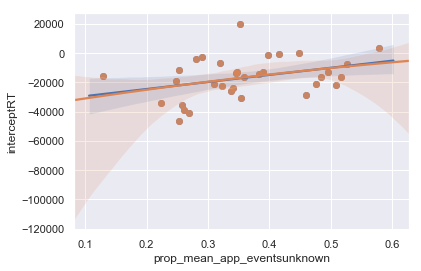

In [169]:
sns.regplot(data['prop_mean_app_eventsunknown'],  data["interceptRT"])
sns.regplot(data['prop_mean_app_eventsunknown'],  data["interceptRT"], order=2)

interpretatie: wie een hogere proportie heeft aan appevents gelinked aan de categorie unknown, zal een minder negatieve of positievere intercept hebt. Dit wil zeggen dat men al een hogere RT heeft om de beginnen. 

<li>prop_mean_app_eventsunknown ~ slopeRT: r=-0.392, p=0.024 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


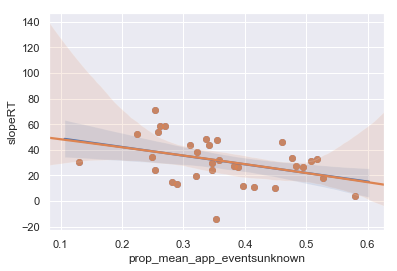

In [170]:
sns.regplot(data['prop_mean_app_eventsunknown'],  data["slopeRT"])
sns.regplot(data['prop_mean_app_eventsunknown'],  data["slopeRT"], order=2)

interpretatie: wie een hogere proportie heeft in appevents gelinked met de categorie unknown, zal een lagere slope hebben. Dit wil zeggen dat er minder toename is in reactietijd, naarmate het interval toeneemt.  

<li>Prop_RT_SC ~ STR_CE_RT: r=0.489, p=0.003 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


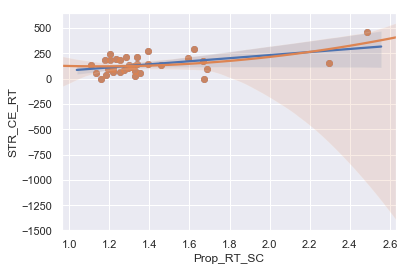

In [171]:
sns.regplot(data['Prop_RT_SC'],  data["STR_CE_RT"])
sns.regplot(data['Prop_RT_SC'],  data["STR_CE_RT"], order=2)

interpretatie: hoe groter de proportionele toename in reactietijd tussen mixed en non-mixed in TST taak, hoe groter de toename in reactietijd tussen congruent en incongruent in de Stroop taak. 

<li>Prop_RT_SC ~ sleepquality: r=0.375, p=0.029</li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


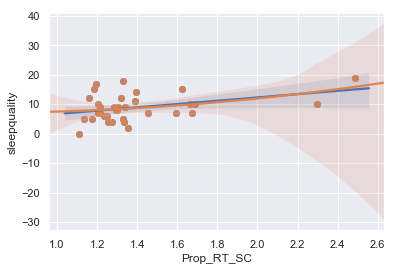

In [172]:
sns.regplot(data['Prop_RT_SC'],  data["sleepquality"])
sns.regplot(data['Prop_RT_SC'],  data["sleepquality"], order=2)

interpretatie: hoe groter de proportionele toename in reactietijd tussen mixed en non-mixed in de TST taak, hoe slechter de gerapporteerde slaapkwaliteit. 

<li>interceptRT ~ slopeRT: r=-0.991, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


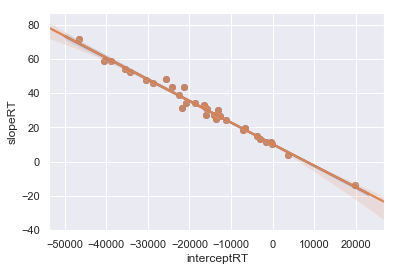

In [173]:
sns.regplot(data['interceptRT'],  data["slopeRT"])
sns.regplot(data['interceptRT'],  data["slopeRT"], order=2)

interpretatie? 

<li>MT ~ prop_treintjes_3: r=0.348, p=0.044 </li> 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


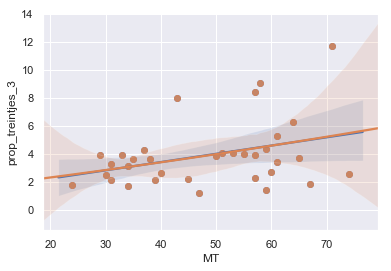

In [174]:
sns.regplot(data['MT'],  data["prop_treintjes_3"])
sns.regplot(data['MT'],  data["prop_treintjes_3"], order=2)

interpretatie: hoe groter de aangegeven multitasking preference, hoe groter de waarde proportie treintjes_3 (maar wat is specifieke interpretatie?)

<li>gem_appE ~ prop_treintjes_3: r=-0.589, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


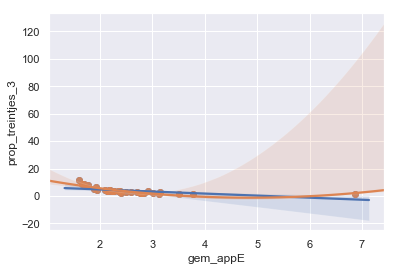

In [175]:
sns.regplot(data['gem_appE'],  data["prop_treintjes_3"])
sns.regplot(data['gem_appE'],  data["prop_treintjes_3"], order=2)

<B> INTERPRETATIE ??? </B>

<li>gem_appE ~ prop_single_app_gr3: r=-0.698, p < .001 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


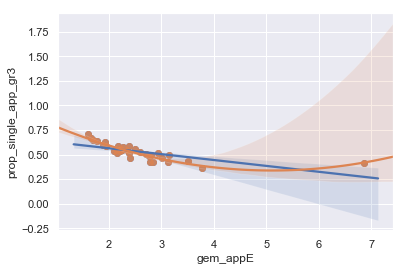

In [176]:
sns.regplot(data['gem_appE'],  data["prop_single_app_gr3"])
sns.regplot(data['gem_appE'],  data["prop_single_app_gr3"], order=2)

<B> INTERPRETATIE ??? </B>

<li>prop_treintjes_3 ~ prop_single_app_gr3: r= 0.898, p < .001 </li>

In [179]:
sns.regplot(data['prop_treintjes_3'],  data["prop_single_app_gr3"])
sns.regplot(data['prop_treintjes_3'],  data["prop_single_app_gr3"], order=2)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


toont dat deze twee waarden gelinked zijn, maar op welke manier? willen ze allebei hetzelfde zeggen? 

<li>prop_treintjes_3 ~ IQ: r = 0.407, p = 0.019 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


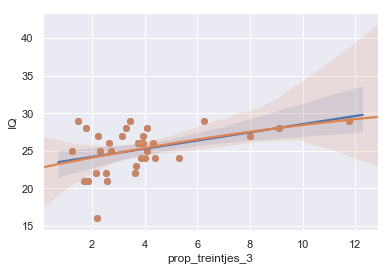

In [181]:
sns.regplot(data['prop_treintjes_3'],  data["IQ"])
sns.regplot(data['prop_treintjes_3'],  data["IQ"], order=2)

interpretatie: wie een hoger IQ heeft, vertoond een significant hogere proportie treintjes_3 => <b> exacte interpretatie?? </b>

<li>reactieSec_not ~ ratio_startedW: r=-0.356, p=0.039 </li>

In [184]:
sns.regplot(data['reactieSec_not'],  data["ratio_startedW"])

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


vertekend beeld? Maar mogelijke interpretatie: wie een tragere reactiesnelheid vertoont op de de notificaties, zal ook een lagere ratio hebben van appevents die gestart zijn vanuit een notificatie. 

<li>reactieSec_not ~ prop_single_app_gr3:  r=-0.403, p=0.018 </li>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


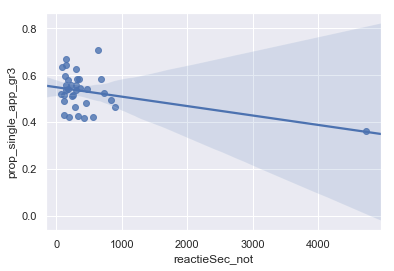

In [185]:
sns.regplot(data['reactieSec_not'],  data["prop_single_app_gr3"])

vertekend beeld? maar mogelijke interpretatie: wie een tragere reactiesnelheid vertoont op notificaties, zal ook een lagere proportie van single applicaties tov multiple apps hebben. Dit wil dus zeggen dat ze tijdens een sessie met meerdere applicaties bezig zijn en zo trager reageren op notificaties. 

<li>prop_single_app_gr3 ~ IQ: r=0.420, p=0.015 </li>                                                                                 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


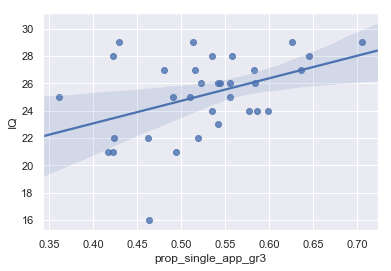

In [186]:
sns.regplot(data["prop_single_app_gr3"], data['IQ'])

interpretatie: wie een hogere proportie heeft van single apps tov multiple apps gedurende een sessie, heeft een hoger IQ. 

#### voor de categoriale variabelen: frequentietabellen krijgen. 

In [273]:
import pandas as pd
import seaborn as sns

##### favoriete moment: top 3

= moment_1, moment_2, moment_3 

In [242]:
moment_1 = data.groupby(["moment_1"]).size().to_frame()

In [279]:
moment_1

moment_1  aantal    moment top
0  prop_appevents_13U-18U      18  moment_1   1
1  prop_appevents_18U-23U      16  moment_1   1

In [280]:
moment_1.columns = ["keuze", "aantal", "moment", "top"]

In [286]:
moment_1 = moment_1[["keuze", "aantal", "moment"]]

In [287]:
moment_top=pd.melt(moment_1,id_vars=["keuze", "moment"],var_name='top', value_name='aantal')

In [288]:
moment_top

keuze    moment     top  aantal
0  prop_appevents_13U-18U  moment_1  aantal      18
1  prop_appevents_18U-23U  moment_1  aantal      16

In [290]:
moment_2 = data.groupby(["moment_2"]).size().to_frame()

In [293]:
moment_2 = moment_2.reset_index()

In [294]:
moment_2.columns = ["moment_2", "aantal"]

In [296]:
moment_2["moment"] = ["moment_2","moment_2","moment_2"]

In [298]:
moment_2.columns = ["keuze", "aantal", "moment"]

In [299]:
moment_top2=pd.melt(moment_2,id_vars=["keuze", "moment"],var_name='top', value_name='aantal')

In [300]:
moment_2

keuze  aantal    moment
0  prop_appevents_13U-18U      16  moment_2
1  prop_appevents_18U-23U      17  moment_2
2   prop_appevents_9U-12U       1  moment_2

In [225]:
moment_3 = data.groupby(["moment_3"]).size().to_frame()

In [301]:
moment_3 = moment_3.reset_index()


In [302]:
moment_3.columns = ["moment_3", "aantal"]

In [304]:
moment_3["moment"] = ["moment_3", "moment_3", "moment_3"]

In [306]:
moment_3.columns = ["keuze", "aantal", "moment"]

In [307]:
moment_top3=pd.melt(moment_3,id_vars=["keuze", "moment"],var_name='top', value_name='aantal')

In [351]:
moment_top3

keuze    moment     top  aantal
0  prop_appevents_18U-23U  moment_3  aantal       1
1   prop_appevents_23U-5U  moment_3  aantal       8
2   prop_appevents_9U-12U  moment_3  aantal      25

### plak de top 3 samen 

In [309]:
top_3 = pd.concat([moment_top, moment_top2, moment_top3])

In [311]:
top_3 = top_3[["keuze", "moment", "aantal"]]

In [315]:
sns.barplot(x="moment", y="aantal", hue = "keuze", data=top_3)
plt.xticks(rotation='vertical')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

##### favoriete appcategorie (MobileDNA): top 3

= ID_1, ID_2, ID_3

In [248]:
ID_1 = data.groupby(["ID_1"]).size().to_frame()

In [317]:
ID_1 = ID_1.reset_index()

In [318]:
ID_1.columns = ["MobileDNA cat", "aantal"]

In [320]:
ID_1["top"] = ["app_cat_1","app_cat_1","app_cat_1","app_cat_1" ]

In [352]:
ID_top1=pd.melt(ID_1,id_vars=["MobileDNA cat", "top"],var_name='optie', value_name='aantal')

In [353]:
ID_top1

MobileDNA cat        top   optie  aantal
0  COMMUNICATION  app_cat_1  aantal       3
1      LIFESTYLE  app_cat_1  aantal       1
2         SOCIAL  app_cat_1  aantal       6
3        unknown  app_cat_1  aantal      24

In [354]:
ID_top1 = ID_top1[["MobileDNA cat", "top", "aantal"]]

In [249]:
ID_2 = data.groupby(["ID_2"]).size().to_frame()

In [325]:
ID_2 = ID_2.reset_index()

In [326]:
ID_2.columns = ["MobileDNA cat", "aantal"]

In [328]:
ID_2["top"] = ["app_cat_2","app_cat_2","app_cat_2"]

In [355]:
ID_top2=pd.melt(ID_2,id_vars=["MobileDNA cat", "top"],var_name='optie', value_name='aantal')

In [356]:
ID_top2 = ID_top2[["MobileDNA cat", "top", "aantal"]]

In [250]:
ID_3 = data.groupby(["ID_3"]).size().to_frame()

In [332]:
ID_3 = ID_3.reset_index()

In [334]:
ID_3.columns = ["MobileDNA cat", "aantal"]

In [335]:
ID_3

MobileDNA cat  aantal
0     COMMUNICATION      17
1   MUSIC_AND_AUDIO       1
2       PHOTOGRAPHY       1
3            SOCIAL      10
4             TOOLS       3
5  TRAVEL_AND_LOCAL       1
6           unknown       1

In [336]:
ID_3["top"] = ["app_cat_3","app_cat_3","app_cat_3","app_cat_3","app_cat_3","app_cat_3","app_cat_3" ]

In [350]:
ID_3

MobileDNA cat  aantal        top
0     COMMUNICATION      17  app_cat_3
1   MUSIC_AND_AUDIO       1  app_cat_3
2       PHOTOGRAPHY       1  app_cat_3
3            SOCIAL      10  app_cat_3
4             TOOLS       3  app_cat_3
5  TRAVEL_AND_LOCAL       1  app_cat_3
6           unknown       1  app_cat_3

In [357]:
ID_top3=pd.melt(ID_3,id_vars=["MobileDNA cat", "top"],var_name='optie', value_name='aantal')

In [358]:
ID_top3 = ID_top3[["MobileDNA cat", "top", "aantal"]]

#### De top 3 van de Mobile DNA ID categorieën samenbrengen. 

In [359]:
top_ID = pd.concat([ID_top1, ID_top2, ID_top3])

In [360]:
top_ID

MobileDNA cat        top  aantal
0     COMMUNICATION  app_cat_1       3
1         LIFESTYLE  app_cat_1       1
2            SOCIAL  app_cat_1       6
3           unknown  app_cat_1      24
0     COMMUNICATION  app_cat_2      11
1            SOCIAL  app_cat_2      14
2           unknown  app_cat_2       9
0     COMMUNICATION  app_cat_3      17
1   MUSIC_AND_AUDIO  app_cat_3       1
2       PHOTOGRAPHY  app_cat_3       1
3            SOCIAL  app_cat_3      10
4             TOOLS  app_cat_3       3
5  TRAVEL_AND_LOCAL  app_cat_3       1
6           unknown  app_cat_3       1

In [362]:
from matplotlib import pylab
from matplotlib.font_manager import FontProperties

In [369]:
sns.barplot(x="top", y="aantal", hue = "MobileDNA cat", data=top_ID)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

##### langst gebruikte applicatie (via specifieke naam): top 5

= langst_nr1, langst_nr2, langst_nr3, langst_nr4, langst_nr5

In [383]:
langst_nr1 = data.groupby(["langst_nr1"]).size().to_frame()

In [384]:
langst_nr1= langst_nr1.reset_index() 

In [385]:
langst_nr1 ["rank"] = ["langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1","langst_nr1"]

In [386]:
langst_nr1.columns = ["specific_app", "aantal", "rank"]

In [387]:
langst_nr1

specific_app  aantal        rank
0                      com.android.chrome       3  langst_nr1
1   com.brokenreality.planemerger.android       2  langst_nr1
2                     com.facebook.katana      10  langst_nr1
3                       com.facebook.orca       1  langst_nr1
4              com.google.android.youtube       6  langst_nr1
5                   com.instagram.android       6  langst_nr1
6              com.jagex.oldscape.android       1  langst_nr1
7           com.samsung.android.messaging       1  langst_nr1
8                    com.snapchat.android       1  langst_nr1
9                            com.whatsapp       2  langst_nr1
10                    org.mozilla.firefox       1  langst_nr1

In [412]:
lang_top1=pd.melt(langst_nr1,id_vars=["specific_app", "rank"],var_name='skip', value_name='aantal')

In [415]:
lang_top1 = lang_top1[["specific_app", "rank", "aantal"]]

In [388]:
langst_nr2 = data.groupby(["langst_nr2"]).size().to_frame()

In [389]:
langst_nr2= langst_nr2.reset_index() 

In [391]:
langst_nr2["rank"] = ["langst_nr2","langst_nr2","langst_nr2","langst_nr2","langst_nr2","langst_nr2","langst_nr2","langst_nr2","langst_nr2"]

In [393]:
langst_nr2.columns = ["specific_app", "aantal", "rank"]

In [416]:
lang_top2=pd.melt(langst_nr2,id_vars=["specific_app", "rank"],var_name='skip', value_name='aantal')

In [417]:
lang_top2 = lang_top2[["specific_app", "rank", "aantal"]]

In [372]:
langst_nr3 = data.groupby(["langst_nr3"]).size().to_frame()

In [395]:
langst_nr3=langst_nr3.reset_index()

In [397]:
langst_nr3["rank"] = ["langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3","langst_nr3",
                     "langst_nr3","langst_nr3","langst_nr3","langst_nr3"]

In [399]:
langst_nr3.columns = ["specific_app", "aantal", "rank"]

In [418]:
lang_top3=pd.melt(langst_nr3,id_vars=["specific_app", "rank"],var_name='skip', value_name='aantal')

In [419]:
lang_top3 = lang_top3[["specific_app", "rank", "aantal"]]

In [373]:
langst_nr4 = data.groupby(["langst_nr4"]).size().to_frame()

In [400]:
langst_nr4=langst_nr4.reset_index()

In [402]:
langst_nr4["rank"]= ["langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4","langst_nr4",
                    "langst_nr4","langst_nr4","langst_nr4","langst_nr4"]

In [403]:
langst_nr4.columns = ["specific_app", "aantal", "rank"]

In [420]:
lang_top4=pd.melt(langst_nr4,id_vars=["specific_app", "rank"],var_name='skip', value_name='aantal')

In [421]:
lang_top4 = lang_top4[["specific_app", "rank", "aantal"]]

In [374]:
langst_nr5 = data.groupby(["langst_nr5"]).size().to_frame()

In [404]:
langst_nr5=langst_nr5.reset_index()

In [406]:
langst_nr5["rank"] = ["langst_nr5","langst_nr5","langst_nr5","langst_nr5",
                     "langst_nr5","langst_nr5","langst_nr5","langst_nr5",
                     "langst_nr5","langst_nr5","langst_nr5","langst_nr5",
                     "langst_nr5","langst_nr5","langst_nr5","langst_nr5",
                     "langst_nr5","langst_nr5","langst_nr5","langst_nr5",
                     "langst_nr5","langst_nr5","langst_nr5","langst_nr5"]

In [407]:
langst_nr5.columns = ["specific_app", "aantal", "rank"]

In [423]:
lang_top5=pd.melt(langst_nr5,id_vars=["specific_app", "rank"],var_name='skip', value_name='aantal')

In [424]:
lang_top5 = lang_top5[["specific_app", "rank", "aantal"]]

In [427]:
lang_top = pd.concat([lang_top1,lang_top2,lang_top3,lang_top4,lang_top5])

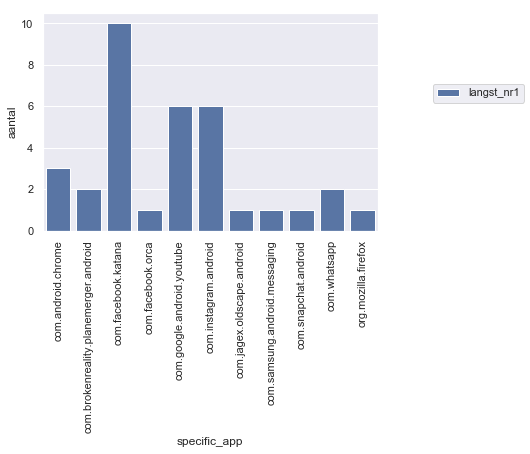

In [434]:
sns.barplot(x="specific_app", y="aantal", hue = "rank", data=lang_top1)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

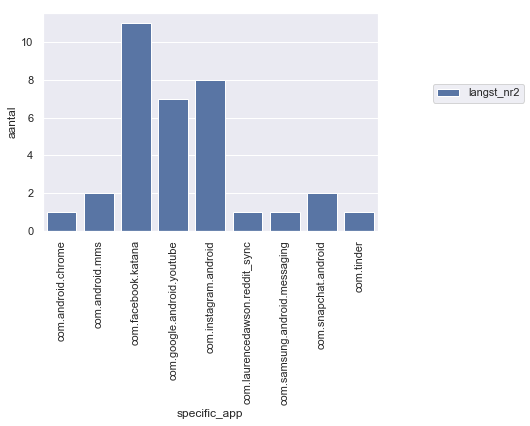

In [435]:
sns.barplot(x="specific_app", y="aantal", hue = "rank", data=lang_top2)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

In [436]:
sns.barplot(x="specific_app", y="aantal", hue = "rank", data=lang_top3)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

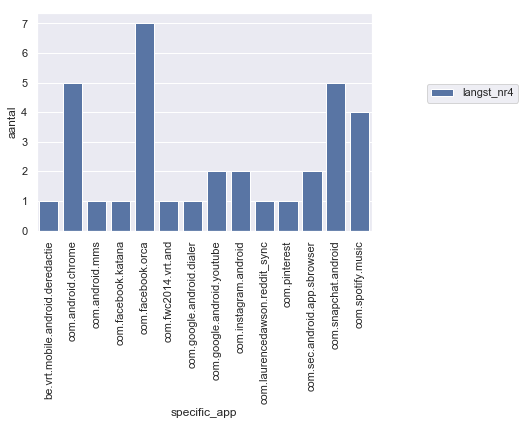

In [437]:
sns.barplot(x="specific_app", y="aantal", hue = "rank", data=lang_top4)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

In [438]:
sns.barplot(x="specific_app", y="aantal", hue = "rank", data=lang_top5)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

##### favoriete appcategorie (volgens qualtrics): top 3

= qualcat_1, qualcat_2, qualcat_3

In [260]:
qualcat_1 = data.groupby(['qualcal_1']).size().to_frame()
qualcat_2 = data.groupby(['qualcat_2']).size().to_frame()
qualcat_3 = data.groupby(['qualcat_3']).size().to_frame()

In [439]:
qualcat_1 = qualcat_1.reset_index()
qualcat_2 = qualcat_2.reset_index()
qualcat_3 = qualcat_3.reset_index()

In [441]:
qualcat_1["rank"] = ["categorie_1","categorie_1","categorie_1","categorie_1","categorie_1","categorie_1"]

In [443]:
qualcat_2["rank"] = ["categorie_2","categorie_2","categorie_2","categorie_2","categorie_2"]

In [445]:
qualcat_3["rank"] = ["categorie_3","categorie_3","categorie_3","categorie_3","categorie_3","categorie_3"]

In [447]:
qualcat_1.columns = ["categorie", "aantal", "rank"]
qualcat_2.columns = ["categorie", "aantal", "rank"]
qualcat_3.columns = ["categorie", "aantal", "rank"]

In [448]:
qual_1 = pd.melt(qualcat_1,id_vars=["categorie", "rank"],var_name='skip', value_name='aantal')
qual_2 = pd.melt(qualcat_2,id_vars=["categorie", "rank"],var_name='skip', value_name='aantal')
qual_3 = pd.melt(qualcat_3,id_vars=["categorie", "rank"],var_name='skip', value_name='aantal')

In [449]:
qual_top_3 = pd.concat([qual_1, qual_2, qual_3])

In [451]:
qual_top_3 = qual_top_3[["categorie", "rank", "aantal"]]

In [452]:
sns.barplot(x="rank", y="aantal", hue = "categorie", data=qual_top_3)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

##### favoriete specifieke app (thuis moment: voor 8 uur en na 18u): top 3

= thuis_1,thuis_2,thuis_3

In [263]:
thuis_1 = data.groupby(['thuis_1']).size().to_frame()
thuis_2 = data.groupby(['thuis_2']).size().to_frame()
thuis_3 = data.groupby(['thuis_3']).size().to_frame()

In [453]:
thuis_1 = thuis_1.reset_index()
thuis_2 = thuis_2.reset_index()
thuis_3 = thuis_3.reset_index()

In [455]:
thuis_1["rank"] = ["thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1","thuis_1"]

In [459]:
thuis_2["rank"] = ["thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2","thuis_2"]

In [460]:
thuis_3["rank"] = ["thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3","thuis_3"]

In [465]:
thuis_1.columns=["applicatie", "aantal", "rank"]

In [466]:
thuis_2.columns=["applicatie", "aantal", "rank"]
thuis_3.columns=["applicatie", "aantal", "rank"]

In [467]:
thuis1 = pd.melt(thuis_1,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')
thuis2 = pd.melt(thuis_2,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')
thuis3 = pd.melt(thuis_3,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')

In [468]:
thuis_top3 = pd.concat([thuis1, thuis2, thuis3])

In [470]:
thuis_top3=thuis_top3[["applicatie", "rank", "aantal"]]

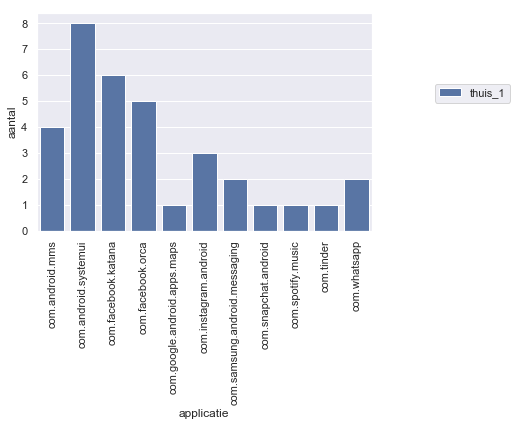

In [493]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=thuis1)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

In [494]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=thuis2)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

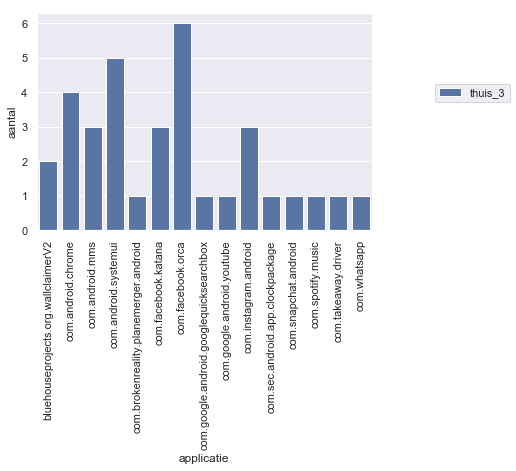

In [495]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=thuis3)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

##### favoriete specifieke app (school moment: tussen 8 uur en 18u): top 3

= school_1, school_2, school_3

In [262]:
school_1 = data.groupby(['school_1']).size().to_frame()
school_2 = data.groupby(['school_2']).size().to_frame()
school_3 = data.groupby(['school_3']).size().to_frame()

In [496]:
school_1 = school_1.reset_index()
school_2 = school_2.reset_index()
school_3 = school_3.reset_index()

In [498]:
school_1["rank"] = ["school_1","school_1","school_1","school_1","school_1","school_1","school_1","school_1","school_1","school_1"]

In [500]:
school_2["rank"] = ["school_2","school_2","school_2","school_2","school_2","school_2","school_2","school_2","school_2"]

In [502]:
school_3["rank"] = ["school_3","school_3","school_3","school_3","school_3","school_3","school_3","school_3","school_3","school_3","school_3","school_3"]

In [503]:
school_1.columns=["applicatie", "aantal", "rank"]
school_2.columns=["applicatie", "aantal", "rank"]
school_3.columns=["applicatie", "aantal", "rank"]

In [504]:
school1 = pd.melt(school_1,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')
school2 = pd.melt(school_2,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')
school3 = pd.melt(school_3,id_vars=["applicatie", "rank"],var_name='skip', value_name='aantal')

In [505]:
school1 = school1[["applicatie", "rank", "aantal"]]
school2 = school2[["applicatie", "rank", "aantal"]]
school3 = school3[["applicatie", "rank", "aantal"]]

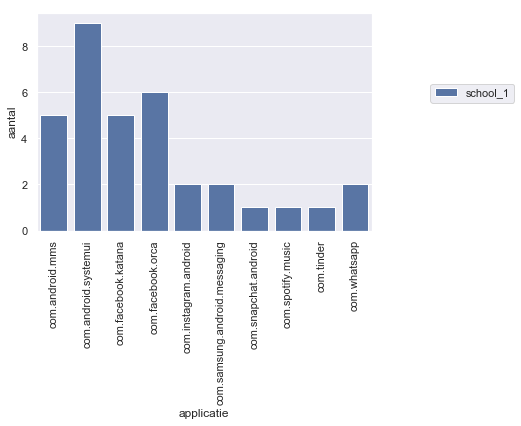

In [506]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=school1)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

In [507]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=school2)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

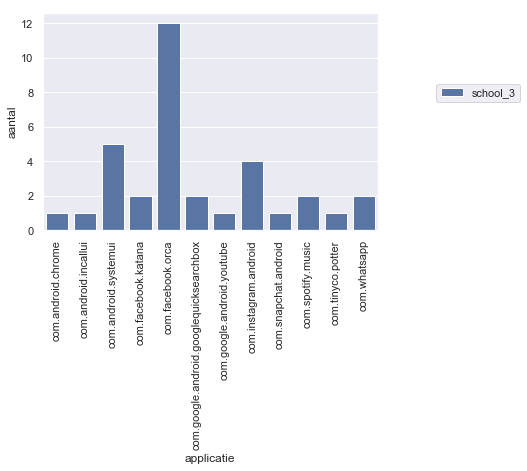

In [508]:
sns.barplot(x="applicatie", y="aantal", hue = "rank", data=school3)
plt.xticks(rotation='vertical')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.7))

In [56]:
datacorr.to_excel("datacorr.xlsx")

In [26]:
list(data)

['ppn',
 'MobileDNA ID',
 'Geslacht',
 'leeftijd',
 'IQ',
 'Simon',
 'log_dag',
 'sec_dag',
 'min_dag',
 'U_dag',
 'apps_dag',
 'U_week',
 'U_weekend',
 'verschil_WEEK',
 'verschil_WEEKEND',
 'prop_appevents_12U-13U',
 'prop_appevents_13U-18U',
 'prop_appevents_18U-23U',
 'prop_appevents_23U-5U',
 'prop_appevents_5U-9U',
 'prop_appevents_9U-12U',
 'prop_un_sessions_12U-13U',
 'prop_un_sessions_13U-18U',
 'prop_un_sessions_18U-23U',
 'prop_un_sessions_23U-5U',
 'prop_un_sessions_5U-9U',
 'prop_un_sessions_9U-12U',
 'moment_1',
 'moment_2',
 'moment_3',
 'prop_mean_app_eventsENTERTAINMENT',
 'prop_mean_app_eventsFINANCE',
 'prop_mean_app_eventsGAME_ARCADE',
 'prop_mean_app_eventsHEALTH_AND_FITNESS',
 'prop_mean_app_eventsLIFESTYLE',
 'prop_mean_app_eventsMAPS_AND_NAVIGATION',
 'prop_mean_app_eventsMUSIC_AND_AUDIO',
 'prop_mean_app_eventsNEWS_AND_MAGAZINES',
 'prop_mean_app_eventsPHOTOGRAPHY',
 'prop_mean_app_eventsPRODUCTIVITY',
 'prop_mean_app_eventsSHOPPING',
 'prop_mean_app_eventsSOCI

In [8]:
results = smf.ols('MT ~ U_dag', data=data).fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.4417
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.511
Time:                        15:50:10   Log-Likelihood:                -136.74
No. Observations:                  34   AIC:                             277.5
Df Residuals:                      32   BIC:                             280.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0504      4.519     11.296      0.0

In [21]:
results = smf.ols('MT ~ Geslacht', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6834
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.414
Time:                        16:10:49   Log-Likelihood:                -158.89
No. Observations:                  40   AIC:                             321.8
Df Residuals:                      38   BIC:                             325.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.7368      3.025     16.774

In [22]:
results = smf.ols('MT ~ leeftijd', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.433
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.127
Time:                        16:11:09   Log-Likelihood:                -158.01
No. Observations:                  40   AIC:                             320.0
Df Residuals:                      38   BIC:                             323.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9308     18.701      1.066      0.2

In [23]:
results = smf.ols('MT ~ IQ', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.03367
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.855
Time:                        16:11:26   Log-Likelihood:                -155.55
No. Observations:                  39   AIC:                             315.1
Df Residuals:                      37   BIC:                             318.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8176     15.952      2.872      0.0

In [27]:
results = smf.ols('MT ~ apps_dag', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                   0.09029
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.766
Time:                        16:12:45   Log-Likelihood:                -136.92
No. Observations:                  34   AIC:                             277.8
Df Residuals:                      32   BIC:                             280.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2992      7.707      6.007      0.0

In [28]:
results = smf.ols('MT ~ sleepquality', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4716
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.496
Time:                        16:13:10   Log-Likelihood:                -159.00
No. Observations:                  40   AIC:                             322.0
Df Residuals:                      38   BIC:                             325.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.0623      4.664      9.877   

In [29]:
results = smf.ols('MT ~ U_week +  U_weekend + U_week:U_weekend', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2.873
Date:                Mon, 31 Dec 2018   Prob (F-statistic):             0.0527
Time:                        16:13:55   Log-Likelihood:                -132.68
No. Observations:                  34   AIC:                             273.4
Df Residuals:                      30   BIC:                             279.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           51.8853      6.640  

In [30]:
results = smf.ols('Prop_RT_SC ~ Geslacht+leeftijd+IQ+apps_dag+U_week+U_weekend', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prop_RT_SC   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.7390
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.623
Time:                        16:18:08   Log-Likelihood:                -3.9171
No. Observations:                  33   AIC:                             21.83
Df Residuals:                      26   BIC:                             32.31
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2866      0.752      1.711

In [32]:
results = smf.ols('MT ~ Geslacht+leeftijd+IQ+apps_dag+U_week+U_weekend+sleepquality+Prop_RT_SC', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     MT   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1.659
Date:                Mon, 31 Dec 2018   Prob (F-statistic):              0.160
Time:                        16:19:43   Log-Likelihood:                -125.97
No. Observations:                  33   AIC:                             269.9
Df Residuals:                      24   BIC:                             283.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.4305     33.346     -0.103

## Networks 

https://campus.datacamp.com/courses/network-analysis-in-python-part-1/introduction-to-networks?ex=1
NetworkX

In [33]:
import networkx as nx 
import nxviz as nv

ModuleNotFoundError: No module named 'nxviz'

In [18]:
G = nx.Graph()

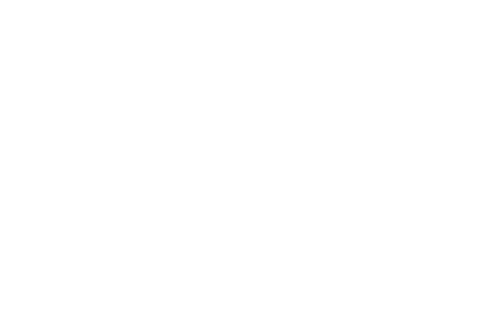

In [19]:
nx.draw(G)
plt.show()